In [ ]:
install.packages("corrplot")
install.packages("leaps")
install.packages("MASS")
install.packages("mgcv")
install.packages("purrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)

stud = read.csv("/content/adm_data.csv")
head(stud)

,Serial.No.,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,337,118,4,4.5,4.5,9.65,1,0.92
2,2,324,107,4,4.0,4.5,8.87,1,0.76
3,3,316,104,3,3.0,3.5,8.00,1,0.72
4,4,322,110,3,3.5,2.5,8.67,1,0.80
5,5,314,103,2,2.0,3.0,8.21,0,0.65
6,6,330,115,5,4.5,3.0,9.34,1,0.90


In [ ]:
stud = subset(stud, select =  -c(Serial.No.))

In [ ]:
head(stud)

,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90


In [ ]:
cat("There are ", sum(is.na(stud)), "Null Values in the dataframe")

There are  0 Null Values in the dataframe

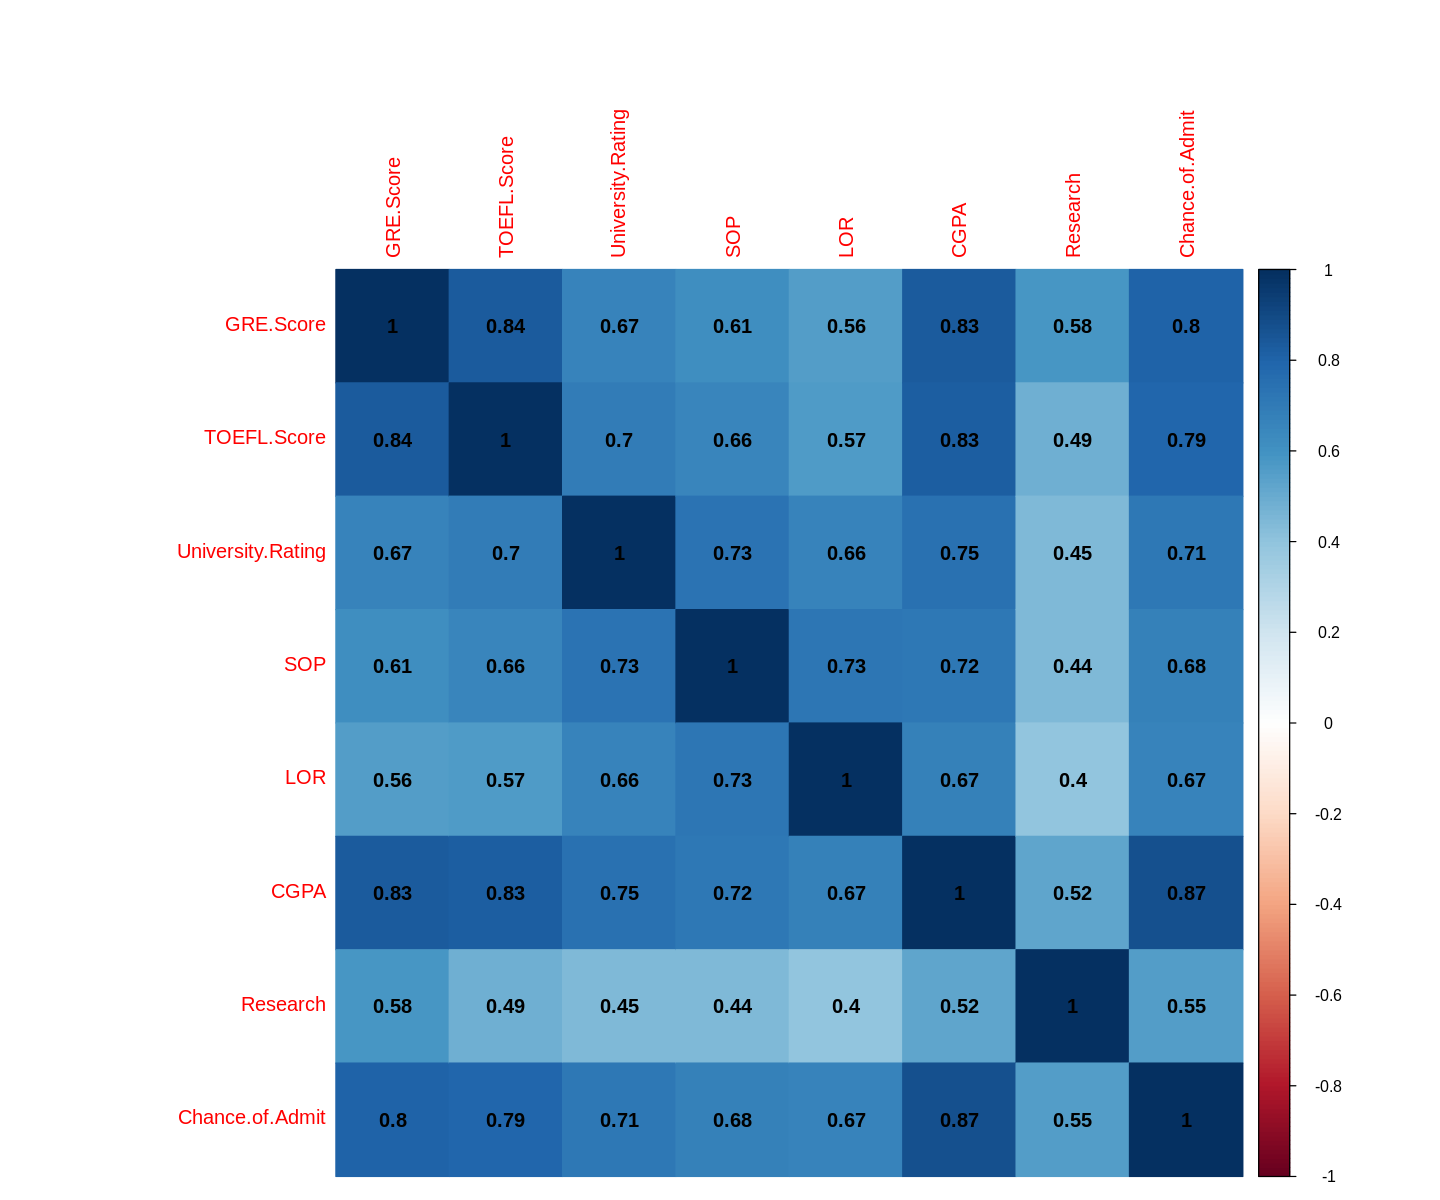

In [ ]:
library(corrplot)
corrplot(cor(stud), method = "color", addCoef.col = "black")

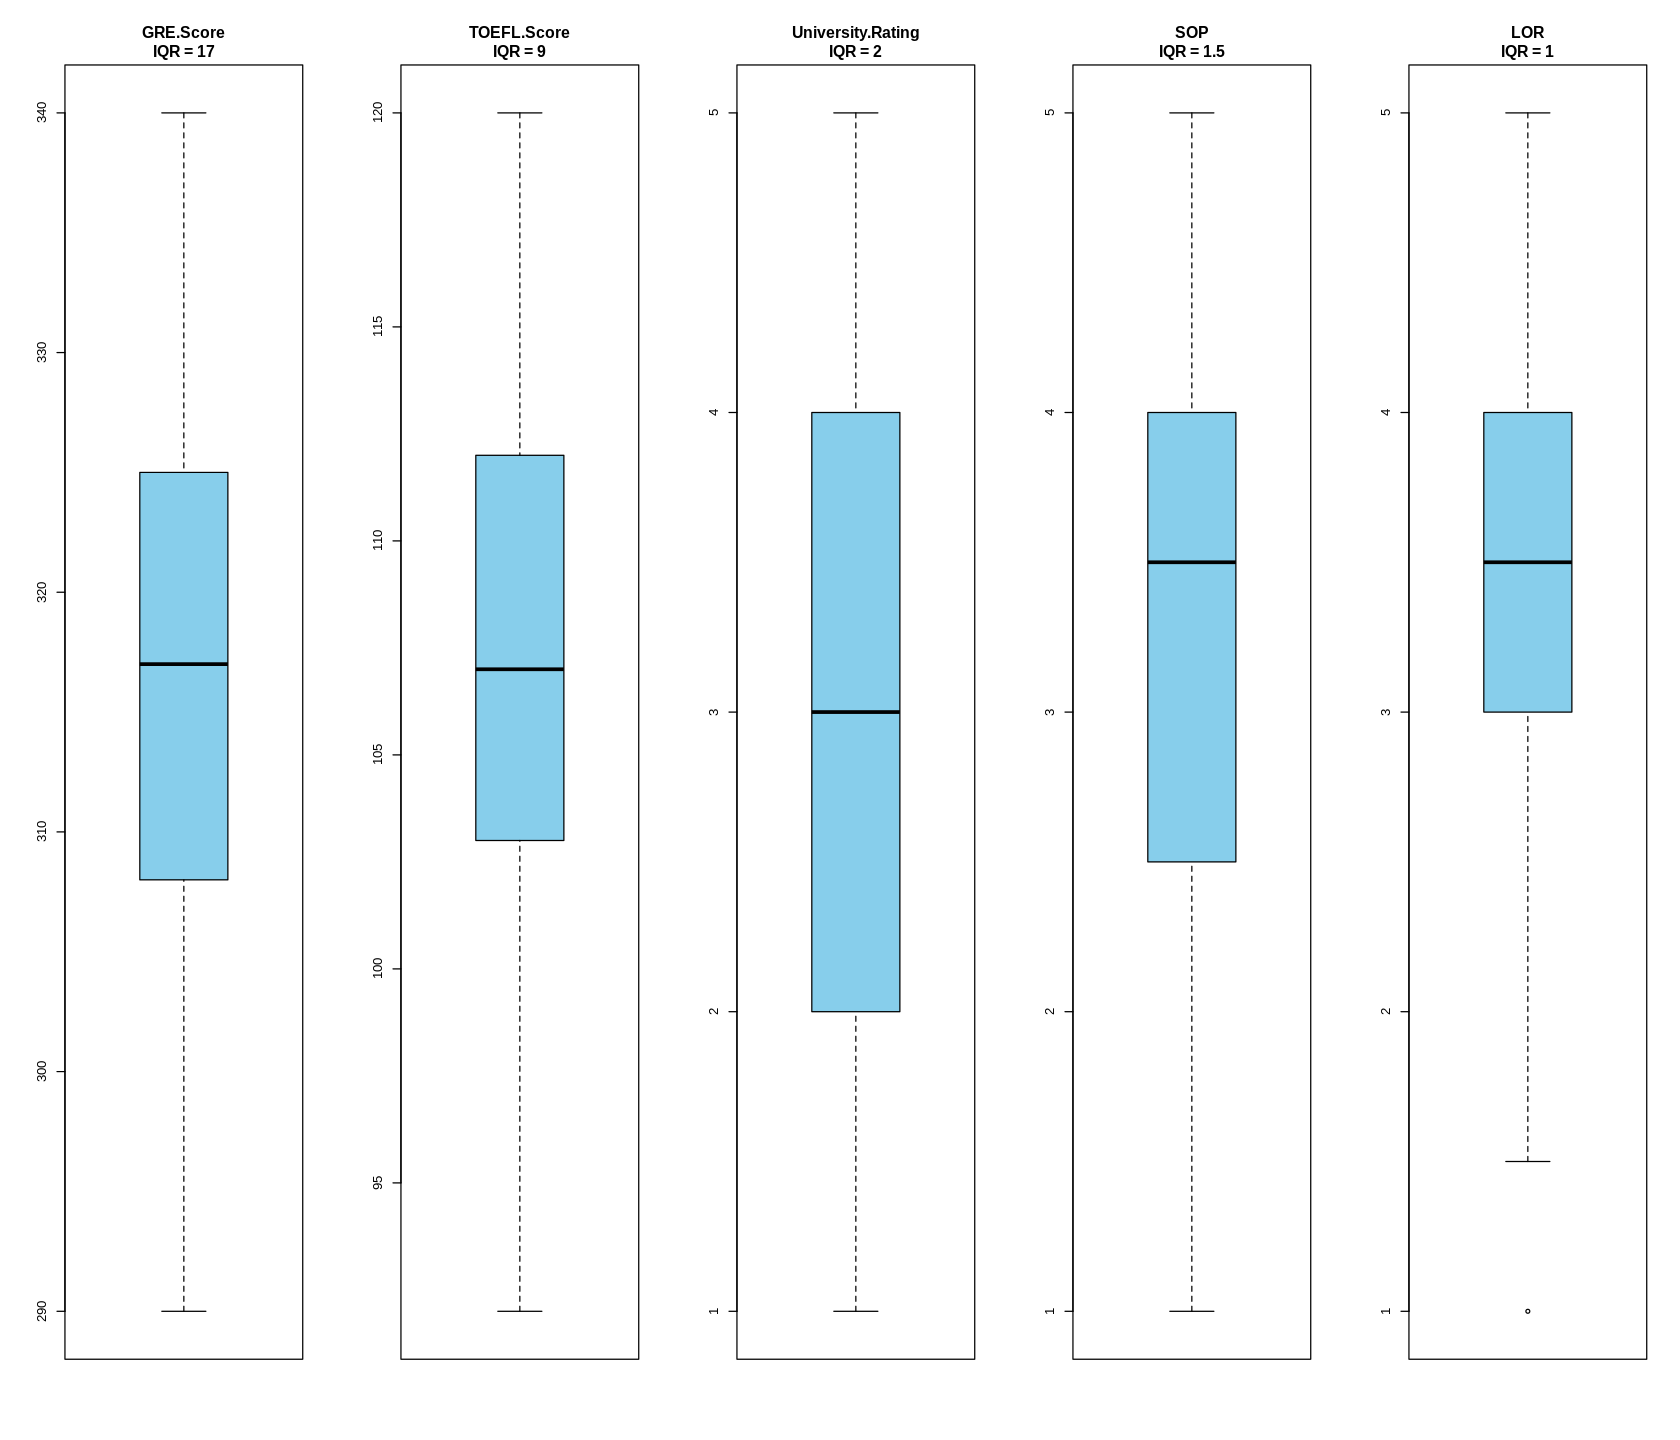

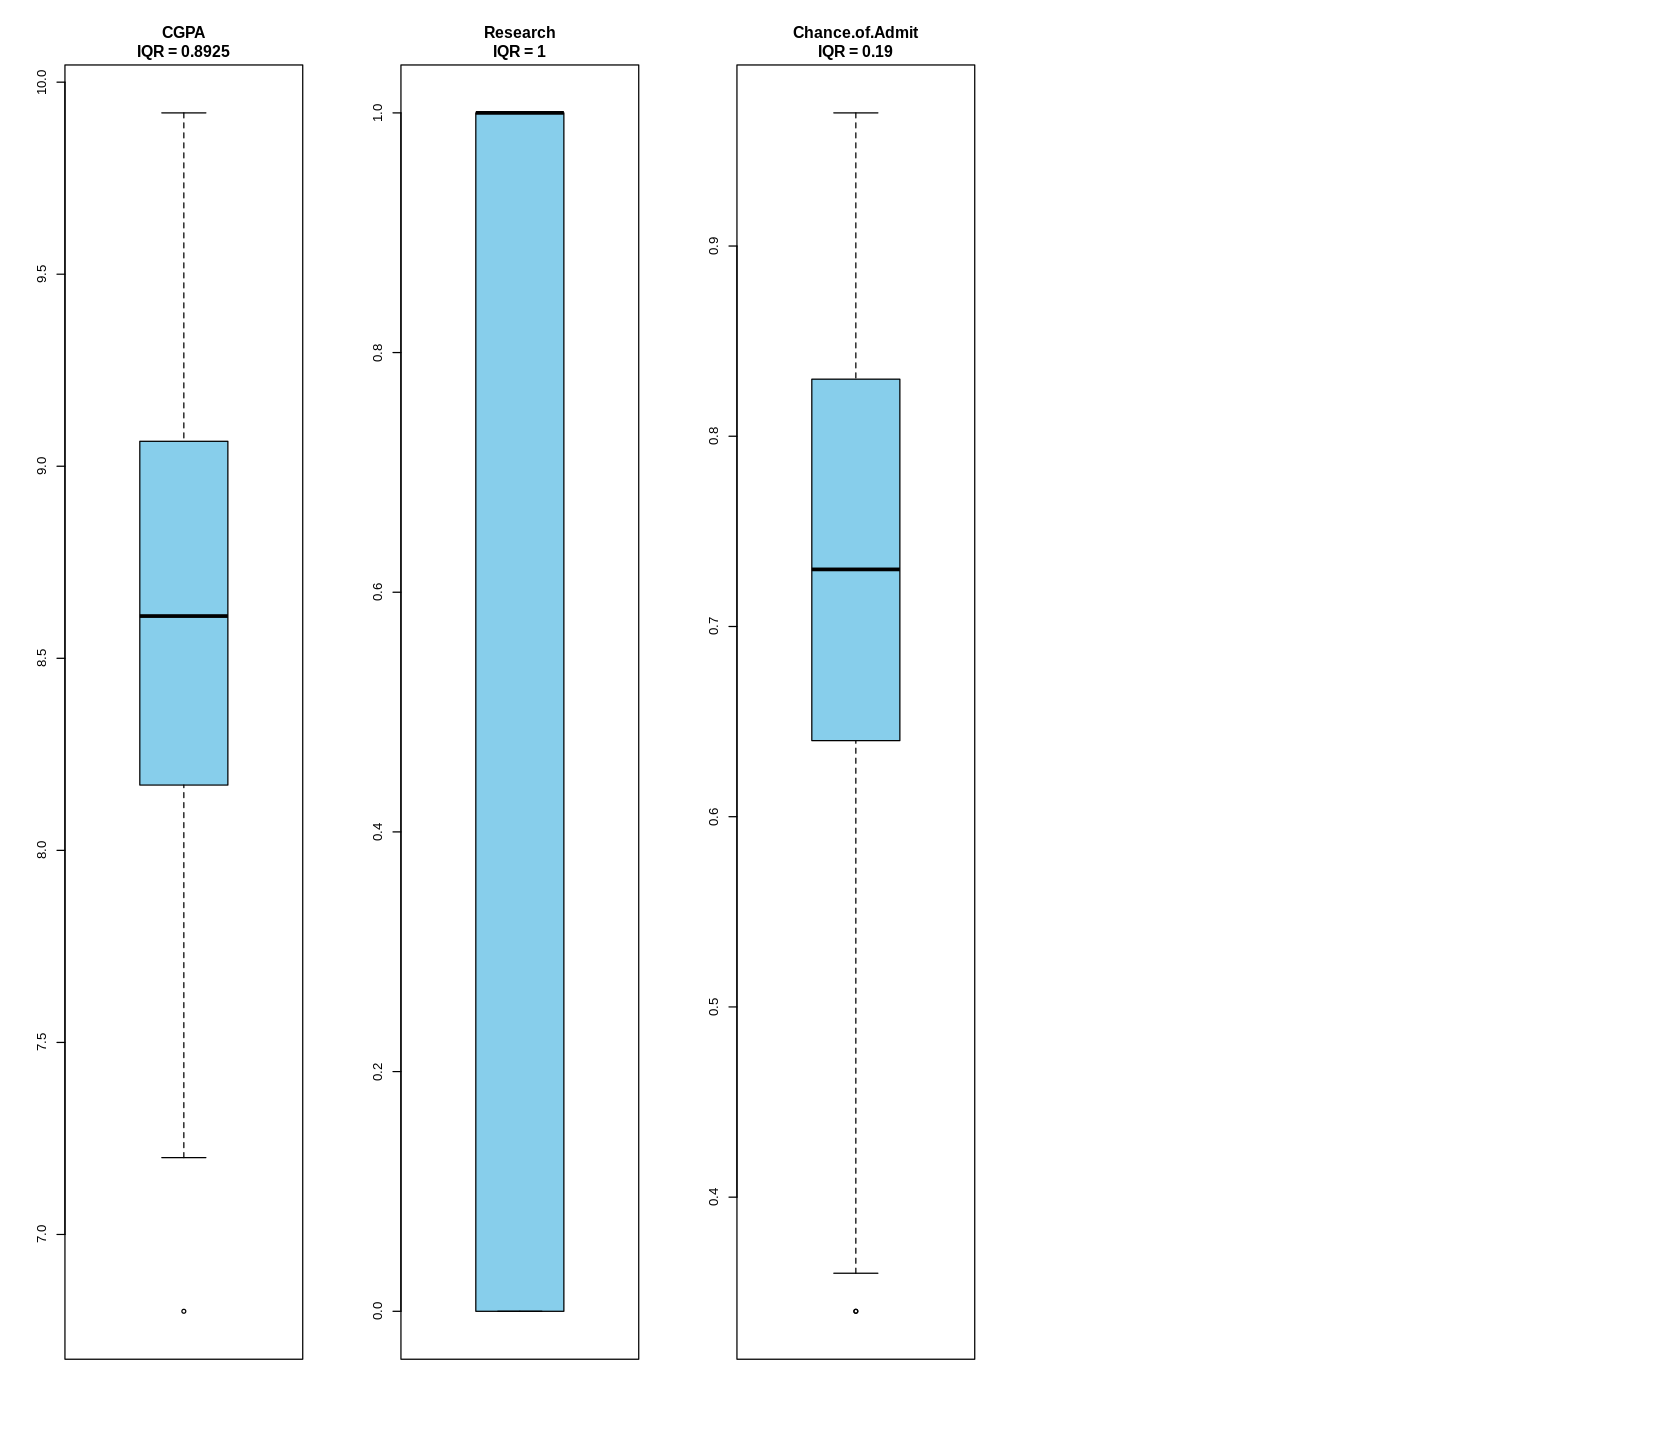

In [ ]:
# Outlier analysis
par(mfrow=c(1,5))
options(repr.plot.width=14, repr.plot.height=12)
boxplot(stud$GRE.Score, main="GRE.Score", col = "skyblue")
title(main = paste("IQR =", IQR(stud$GRE.Score)), line=0.5)
boxplot(stud$TOEFL.Score, main="TOEFL.Score", col = "skyblue")
title(main = paste("IQR =", IQR(stud$TOEFL.Score)), line=0.5)
boxplot(stud$University.Rating, main="University.Rating", col = "skyblue")
title(main = paste("IQR =", IQR(stud$University.Rating)), line=0.5)
boxplot(stud$SOP, main="SOP", col = "skyblue")
title(main = paste("IQR =", IQR(stud$SOP)), line=0.5)
boxplot(stud$LOR, main="LOR", col = "skyblue")
title(main = paste("IQR =", IQR(stud$LOR)), line=0.5)
boxplot(stud$CGPA, main="CGPA", col = "skyblue")
title(main = paste("IQR =", IQR(stud$CGPA)), line=0.5)
boxplot(stud$Research, main="Research", col = "skyblue")
title(main = paste("IQR =", IQR(stud$Research)), line=0.5)
boxplot(stud$Chance.of.Admit, main="Chance.of.Admit", col = "skyblue")
title(main = paste("IQR =", IQR(stud$Chance.of.Admit)), line=0.5)


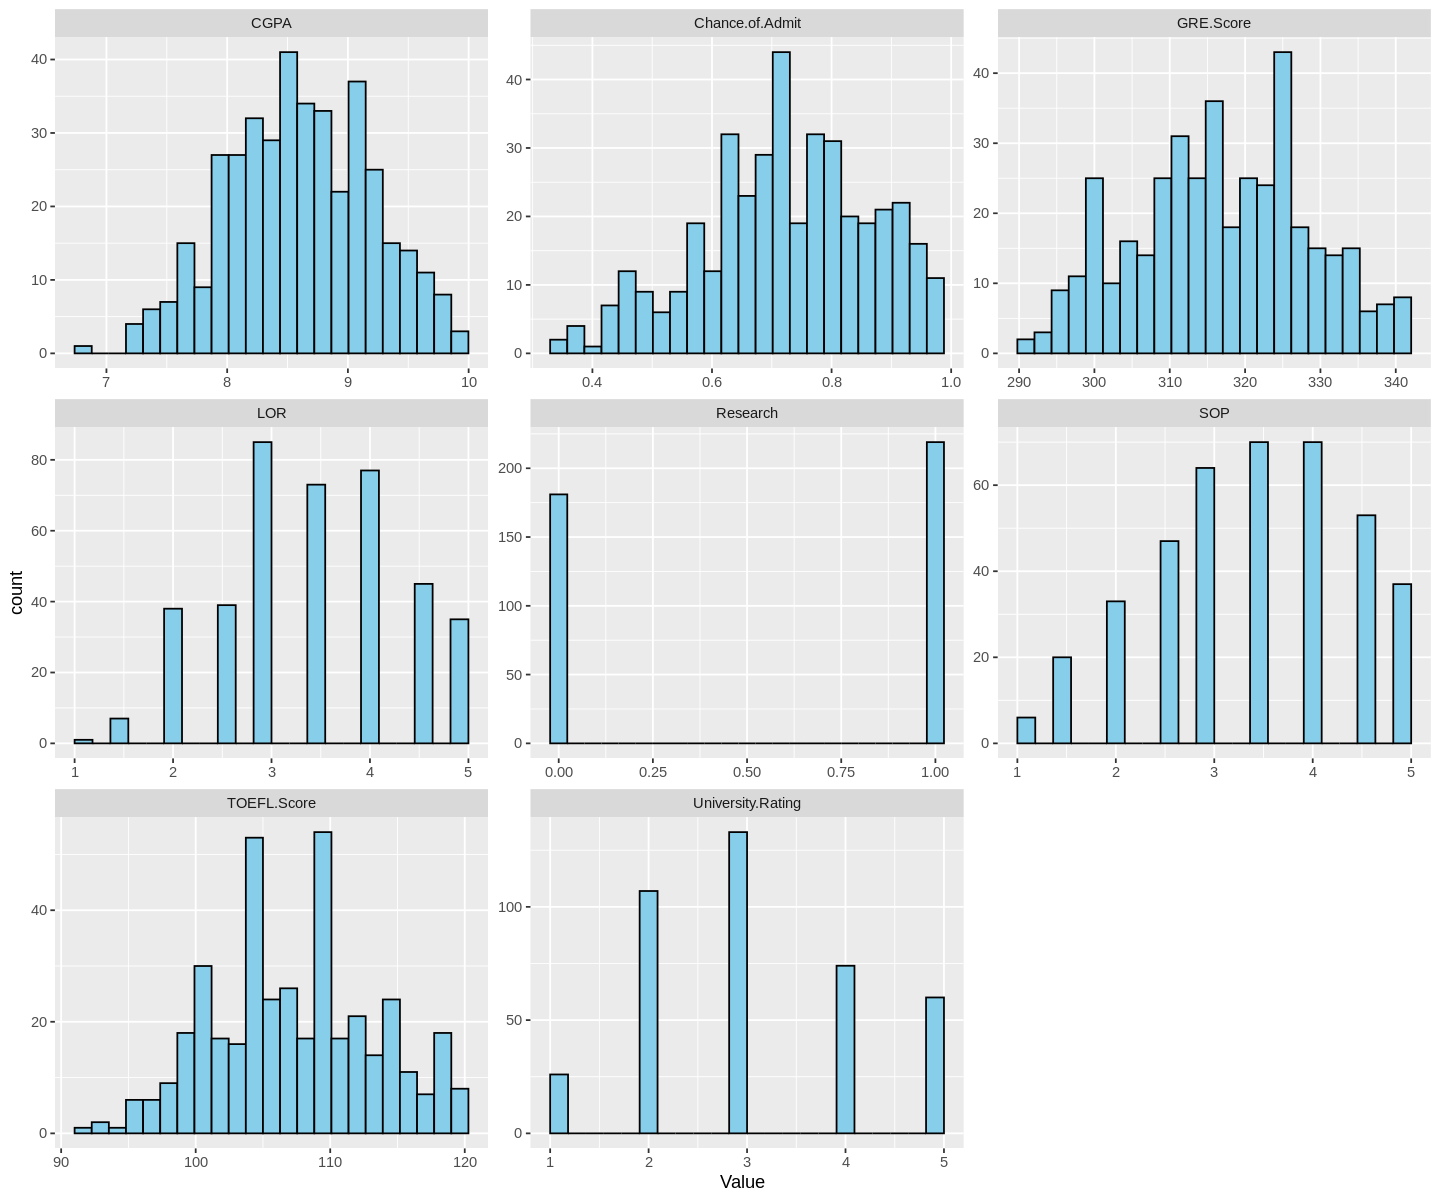

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)

stud %>%
  select_if(is.numeric) %>%
  gather(key = "Variable", value = "Value") %>%
  ggplot(aes(Value)) +
  facet_wrap(~ Variable, scales = "free") +
  geom_histogram(bins = 23, color = "black", fill = "skyblue")

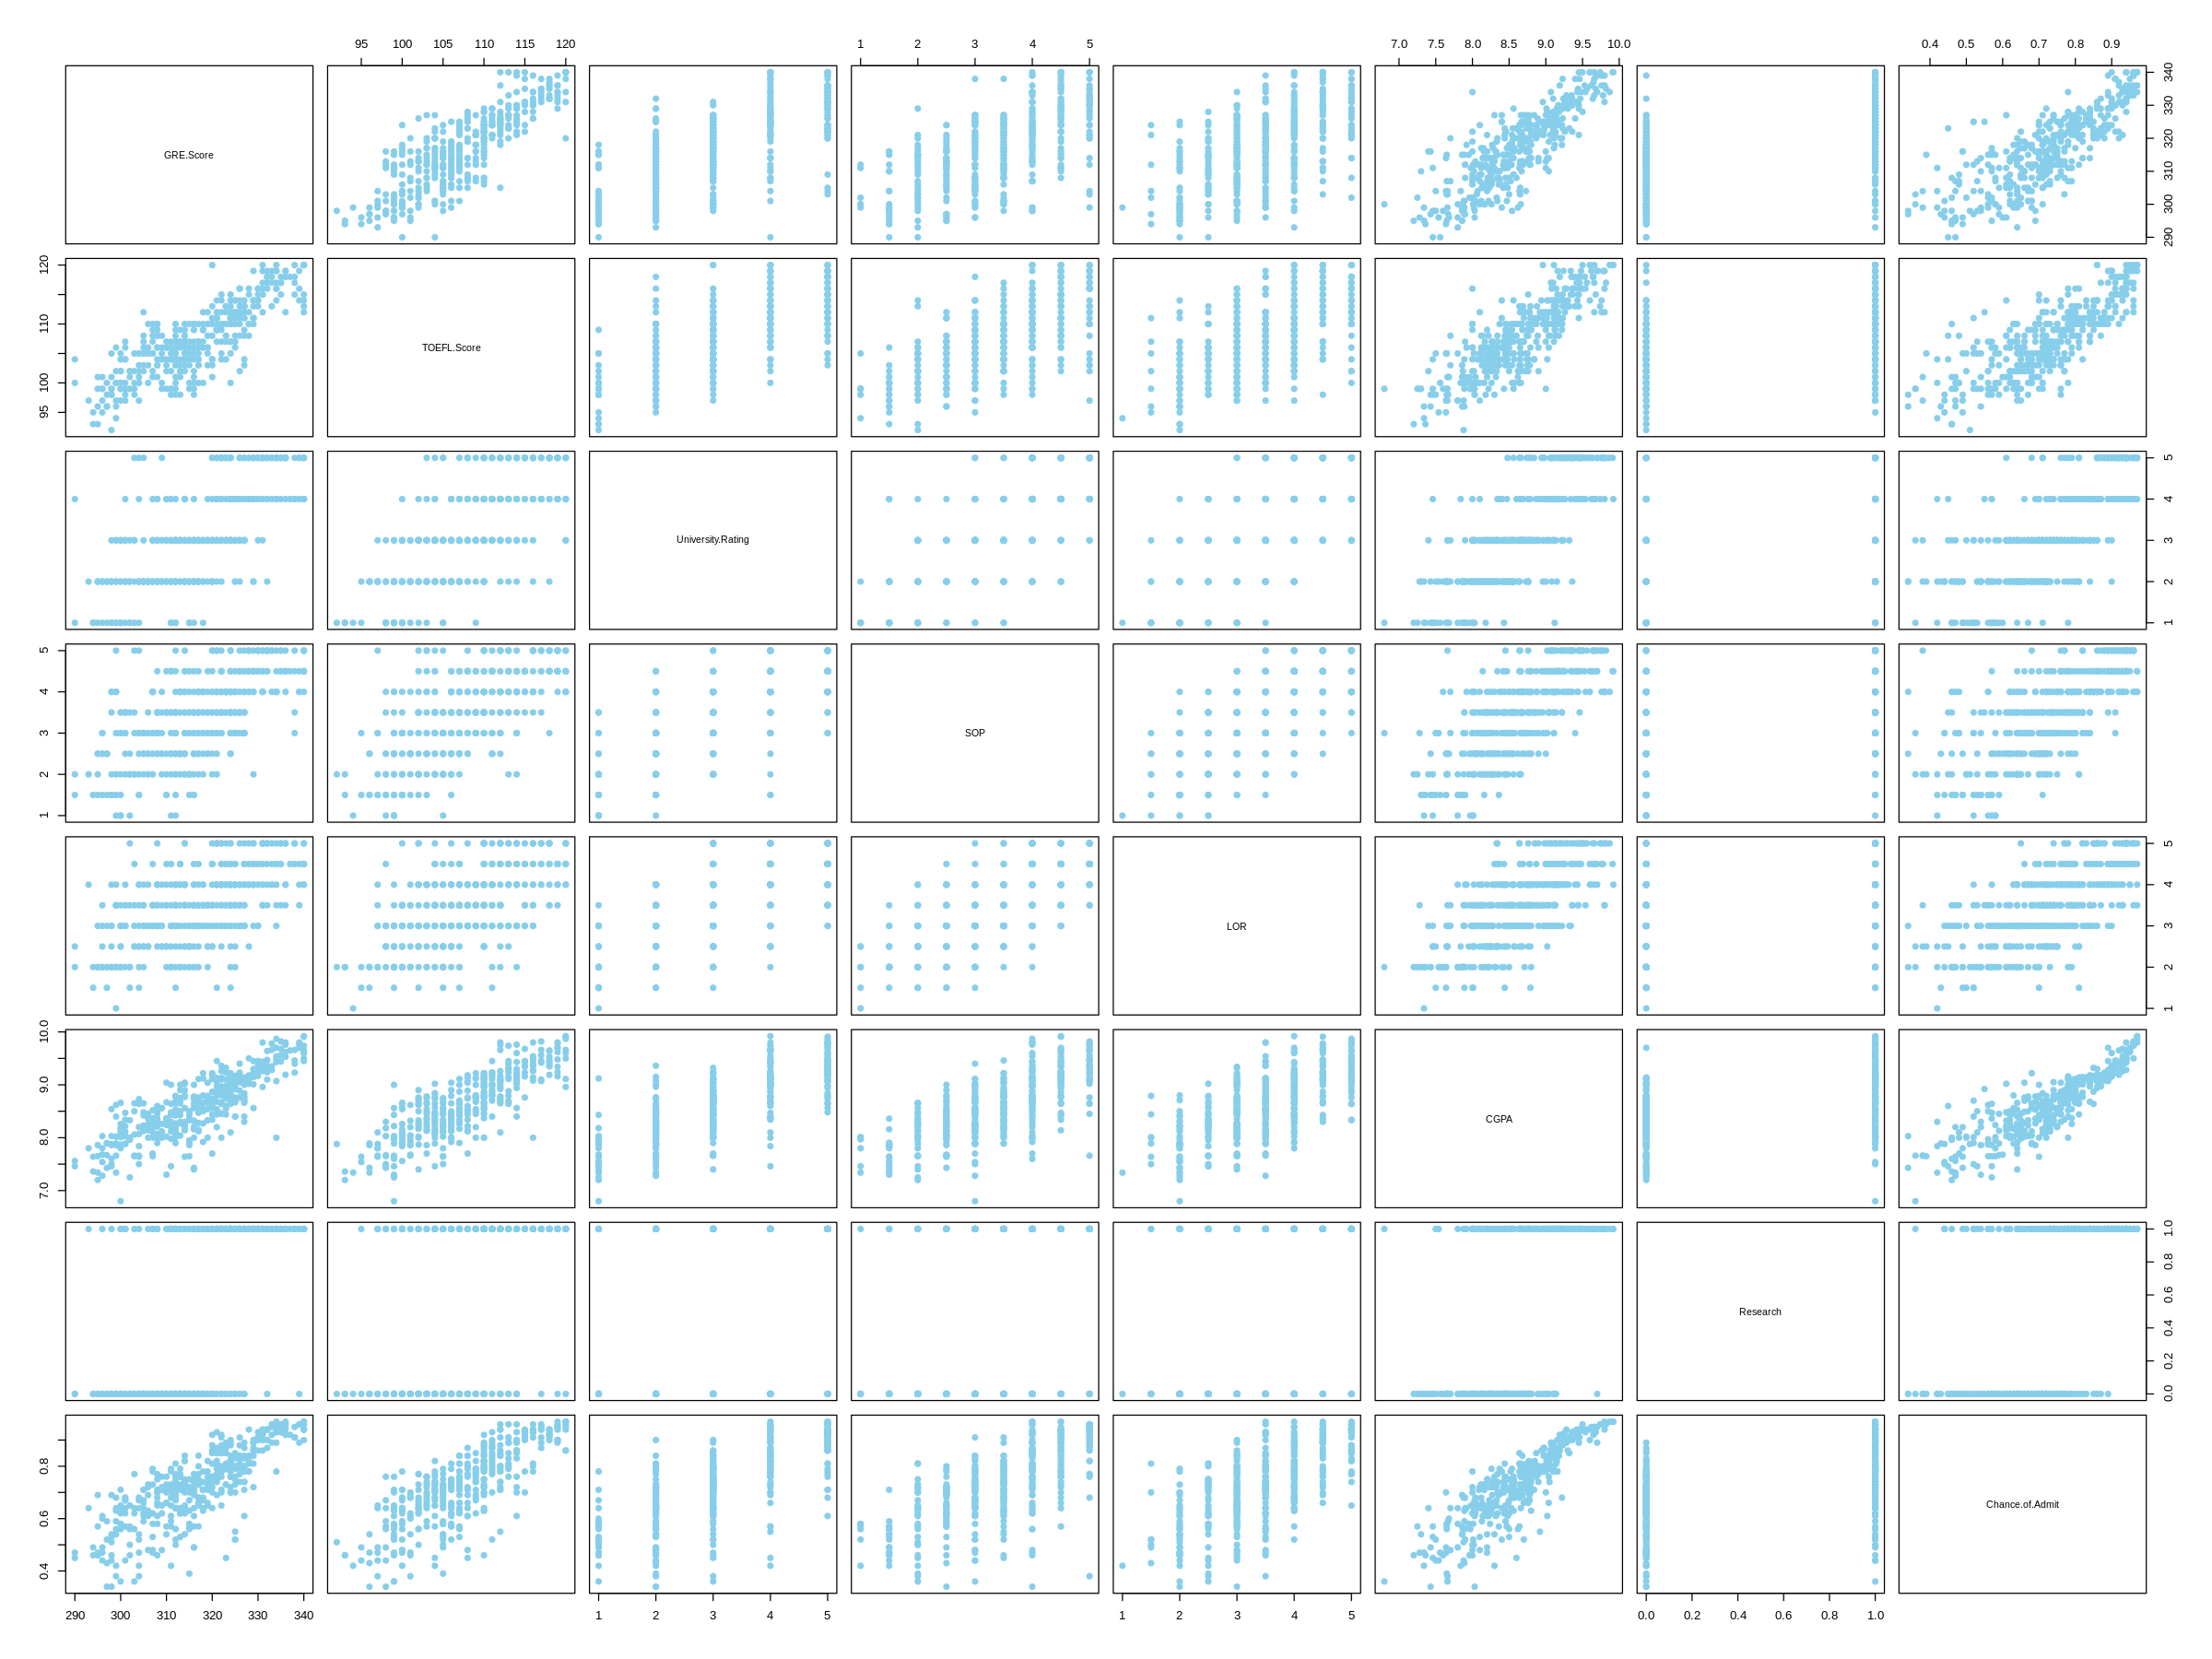

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 15)
pairs(stud, pch = 19, col = "skyblue")

**F-test**

In [ ]:
# Full Model
full_model = lm(Chance.of.Admit ~ ., data = stud)
summary(full_model)


Call:
lm(formula = Chance.of.Admit ~ ., data = stud)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26259 -0.02103  0.01005  0.03628  0.15928 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.2594325  0.1247307 -10.097  < 2e-16 ***
GRE.Score          0.0017374  0.0005979   2.906  0.00387 ** 
TOEFL.Score        0.0029196  0.0010895   2.680  0.00768 ** 
University.Rating  0.0057167  0.0047704   1.198  0.23150    
SOP               -0.0033052  0.0055616  -0.594  0.55267    
LOR                0.0223531  0.0055415   4.034  6.6e-05 ***
CGPA               0.1189395  0.0122194   9.734  < 2e-16 ***
Research           0.0245251  0.0079598   3.081  0.00221 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06378 on 392 degrees of freedom
Multiple R-squared:  0.8035,	Adjusted R-squared:    0.8 
F-statistic: 228.9 on 7 and 392 DF,  p-value: < 2.2e-16


In [ ]:
reduced_model = lm(Chance.of.Admit ~ GRE.Score + LOR + CGPA, data = stud)
summary(reduced_model)


Call:
lm(formula = Chance.of.Admit ~ GRE.Score + LOR + CGPA, data = stud)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.282361 -0.024311  0.009542  0.037401  0.167673 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.4905709  0.1061064 -14.048  < 2e-16 ***
GRE.Score    0.0030555  0.0005123   5.964 5.46e-09 ***
LOR          0.0244332  0.0048764   5.011 8.20e-07 ***
CGPA         0.1351983  0.0110258  12.262  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06495 on 396 degrees of freedom
Multiple R-squared:  0.7941,	Adjusted R-squared:  0.7926 
F-statistic: 509.2 on 3 and 396 DF,  p-value: < 2.2e-16


**F-test** <br>
**Null Hypothesis** $H_0$: The reduced model is is sufficient i.e additional predictors in the full model (TOEFL.Score, University.Rating, and Research) do not contribute significantly to the model's ability to explain the variance in the response variable<br>
**Alternative Hypothesis** $H_1$: The reduced model is not sufficient for the chance of admit. i.e. at least one of the additional predictors in the full model (TOEFL.Score, University.Rating, or Research) contributes significantly to the model's ability to explain the variance in the response variable (Chance.of.Admit),<br>

In [ ]:
# Perform an F-test comparing the two models
anova(reduced_model, full_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,396,1.670635,NA,NA,NA,NA
2,392,1.594757,4,0.07587723,4.662759,0.001094203


Here the pvalue of the F-test is 0.001094203 hence we reject the null hypothesis. This suggest that the full model is significantly better than the reduced model and additional factors such as TOEFL Scorem Research do contribute significantly to the model's ability to explain the variance in the response variable(Chance.of.Admit)

**t-test** <br>
The Welch Two Sample t-test is a statistical test used to compare the means of two independent groups when the variances of the two groups are not equal. The Welch Two Sample t-test assumes independence of the observations, no significant outliers in the two groups, and normality of the data for each group

**Null Hypothesis** $H_0$: The mean of Chance.of.Admit is the same for universities with a rating of 4 and those with a rating of 5.  $H_0$: $\mu_{4} = \mu_{5}$

**Alternative Hypothesis** $H_1$: The mean of Chance.of.Admit is different between universities with a rating of 4 and those with a rating of 5. $\mu_{4} \neq \mu_{5}$

In [ ]:
t.test(Chance.of.Admit ~ University.Rating, data = stud, subset = University.Rating %in% c(4,5))


	Welch Two Sample t-test

data:  Chance.of.Admit by University.Rating
t = -4.2972, df = 128.3, p-value = 3.39e-05
alternative hypothesis: true difference in means between group 4 and group 5 is not equal to 0
95 percent confidence interval:
 -0.10231681 -0.03780031
sample estimates:
mean in group 4 mean in group 5 
      0.8181081       0.8881667 


The p-value is less than 3.39e-16, which is less than the typical significance level of 0.05, indicating that the null hypothesis can be rejected.

The 95% confidence interval for the difference in means is (-0.10231681 -0.03780031), which suggests that the mean Chance.of.Admit for universities with a rating of 5 is significantly higher than for those with a rating of 4. <br>

The difference in means is estimated to be between -0.10231681 and -0.03780031, indicating that the mean Chance.of.Admit for universities with a rating of 5 is higher by at least 0.03780031 and at most 0.10231681 compared to those with a rating of 4.

This result implies that the university rating has a significant impact on the chance of admission, with higher-rated universities having a higher chance of admission

****

In [ ]:
set.seed(11)

n = floor(0.8 * nrow(stud))

index = sample(seq_len(nrow(stud)), size = n)

train = stud[index, ]

test = stud[-index, ]

cat("There are", dim(train)[1], "rows and", dim(train)[2], "columns in the training set.\n")
cat("There are", dim(test)[1], "rows and", dim(test)[2], "columns in the testing set.\n")

There are 320 rows and 8 columns in the training set.
There are 80 rows and 8 columns in the testing set.


**Linear Regression**
As CGPA has the highest correlation with Chance of Admit, it is used as the predictor.

In [ ]:
lm_model <- lm(Chance.of.Admit ~ CGPA, data = train)

summary(lm_model)


Call:
lm(formula = Chance.of.Admit ~ CGPA, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.268069 -0.030725  0.008337  0.042190  0.172936 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.059807   0.054767  -19.35   <2e-16 ***
CGPA         0.207706   0.006361   32.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06771 on 318 degrees of freedom
Multiple R-squared:  0.7702,	Adjusted R-squared:  0.7695 
F-statistic:  1066 on 1 and 318 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


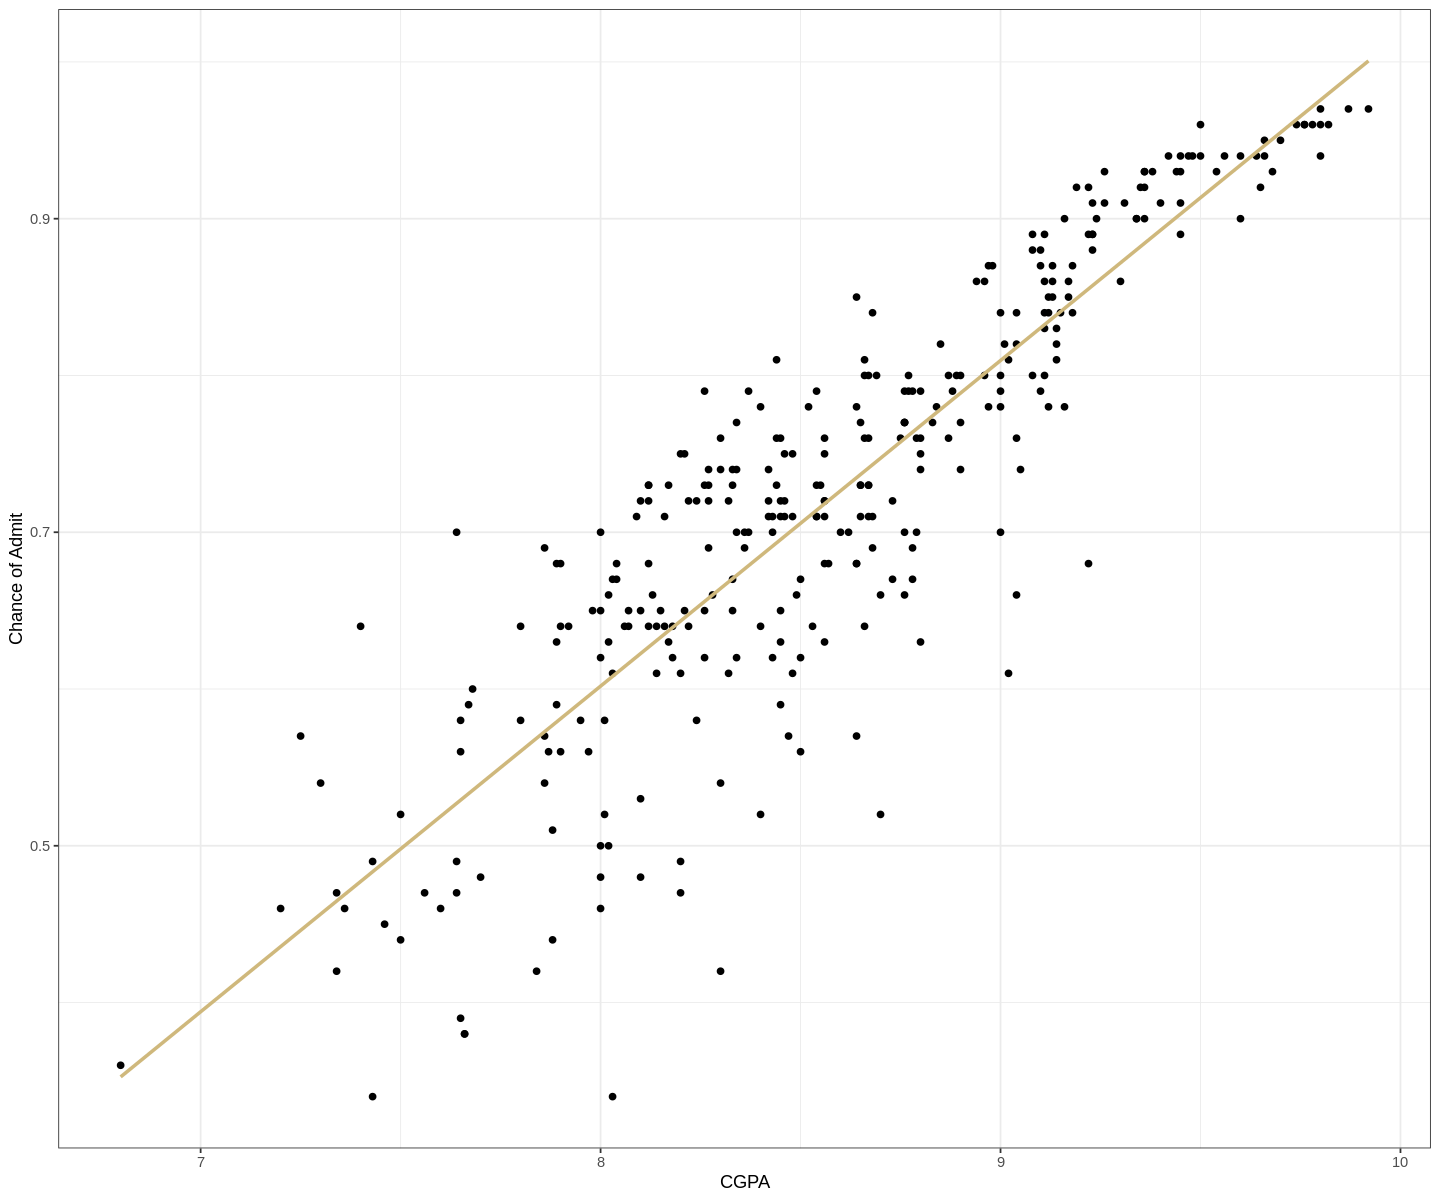

In [ ]:
options(repr.plot.width=12, repr.plot.height=10)
ggplot(train, aes(x = CGPA, y = Chance.of.Admit)) +
  geom_point() +
  geom_smooth(method = "lm", col = "#CFB87C", se = F) +
  theme_bw() +
  xlab("CGPA") +
  ylab("Chance of Admit")

As we can see the line fits the data well except for some points.

**Full Model ANOVA**

In [ ]:
mlr = lm(Chance.of.Admit ~ ., data = stud)
summary(mlr)


Call:
lm(formula = Chance.of.Admit ~ ., data = stud)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26259 -0.02103  0.01005  0.03628  0.15928 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.2594325  0.1247307 -10.097  < 2e-16 ***
GRE.Score          0.0017374  0.0005979   2.906  0.00387 ** 
TOEFL.Score        0.0029196  0.0010895   2.680  0.00768 ** 
University.Rating  0.0057167  0.0047704   1.198  0.23150    
SOP               -0.0033052  0.0055616  -0.594  0.55267    
LOR                0.0223531  0.0055415   4.034  6.6e-05 ***
CGPA               0.1189395  0.0122194   9.734  < 2e-16 ***
Research           0.0245251  0.0079598   3.081  0.00221 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06378 on 392 degrees of freedom
Multiple R-squared:  0.8035,	Adjusted R-squared:    0.8 
F-statistic: 228.9 on 7 and 392 DF,  p-value: < 2.2e-16


In [ ]:
stud_anova = anova(mlr)
stud_anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GRE.Score,1,5.22731180,5.227311803,1284.90162,8.771748e-126
TOEFL.Score,1,0.39211084,0.392110839,96.38297,1.737941e-20
University.Rating,1,0.23695321,0.236953206,58.24438,1.779063e-13
SOP,1,0.07572773,0.075727734,18.61429,2.028067e-05
LOR,1,0.15737874,0.157378737,38.68455,1.278342e-09
CGPA,1,0.39176974,0.391769736,96.29913,1.798034e-20
Research,1,0.03862165,0.038621647,9.49341,2.207647e-03
Residuals,392,1.59475730,0.004068258,NA,NA


In [ ]:
cat(paste("Explained sum of squares:", round(anova(mlr)[[2]][1],2)),
    paste("Residual sum of squares:",round(anova(mlr)[[2]][2],2)),
    paste("Total sum of squares:",round(anova(mlr)[[2]][1] + anova(mlr)[[2]][2],2)),
    paste("Coefficient of determination:",round(summary(mlr)$r.squared,2)),
       sep = "\n")

Explained sum of squares: 5.23
Residual sum of squares: 0.39
Total sum of squares: 5.62
Coefficient of determination: 0.8


Explained sum of squares (ESS): This is the proportion of the total sum of squares that is explained by the regression model. In this case, the ESS is 5.23, indicating that the model explains a significant portion of the variance in `Chance.of.Admit`


Residual sum of squares (RSS): This is the proportion of the total sum of squares that is not explained by the regression model. In this case, the `RSS is 0.39`, indicating that there is some `residual variance` that is not captured by the model.

Residual sum of squares (RSS): This is the proportion of the total sum of squares that is not explained by the regression model. In this case, the `RSS is 0.39`, indicating that there is `some residual variance that is not captured by the model`.

Coefficient of determination (R-squared): This is a measure of how well the model fits the data. In this case, the `R-squared value is 0.8, indicating that the model explains about 80% of the variance in Chance.of.Admit.` This is a relatively high value, suggesting that the model is a good fit to the data.

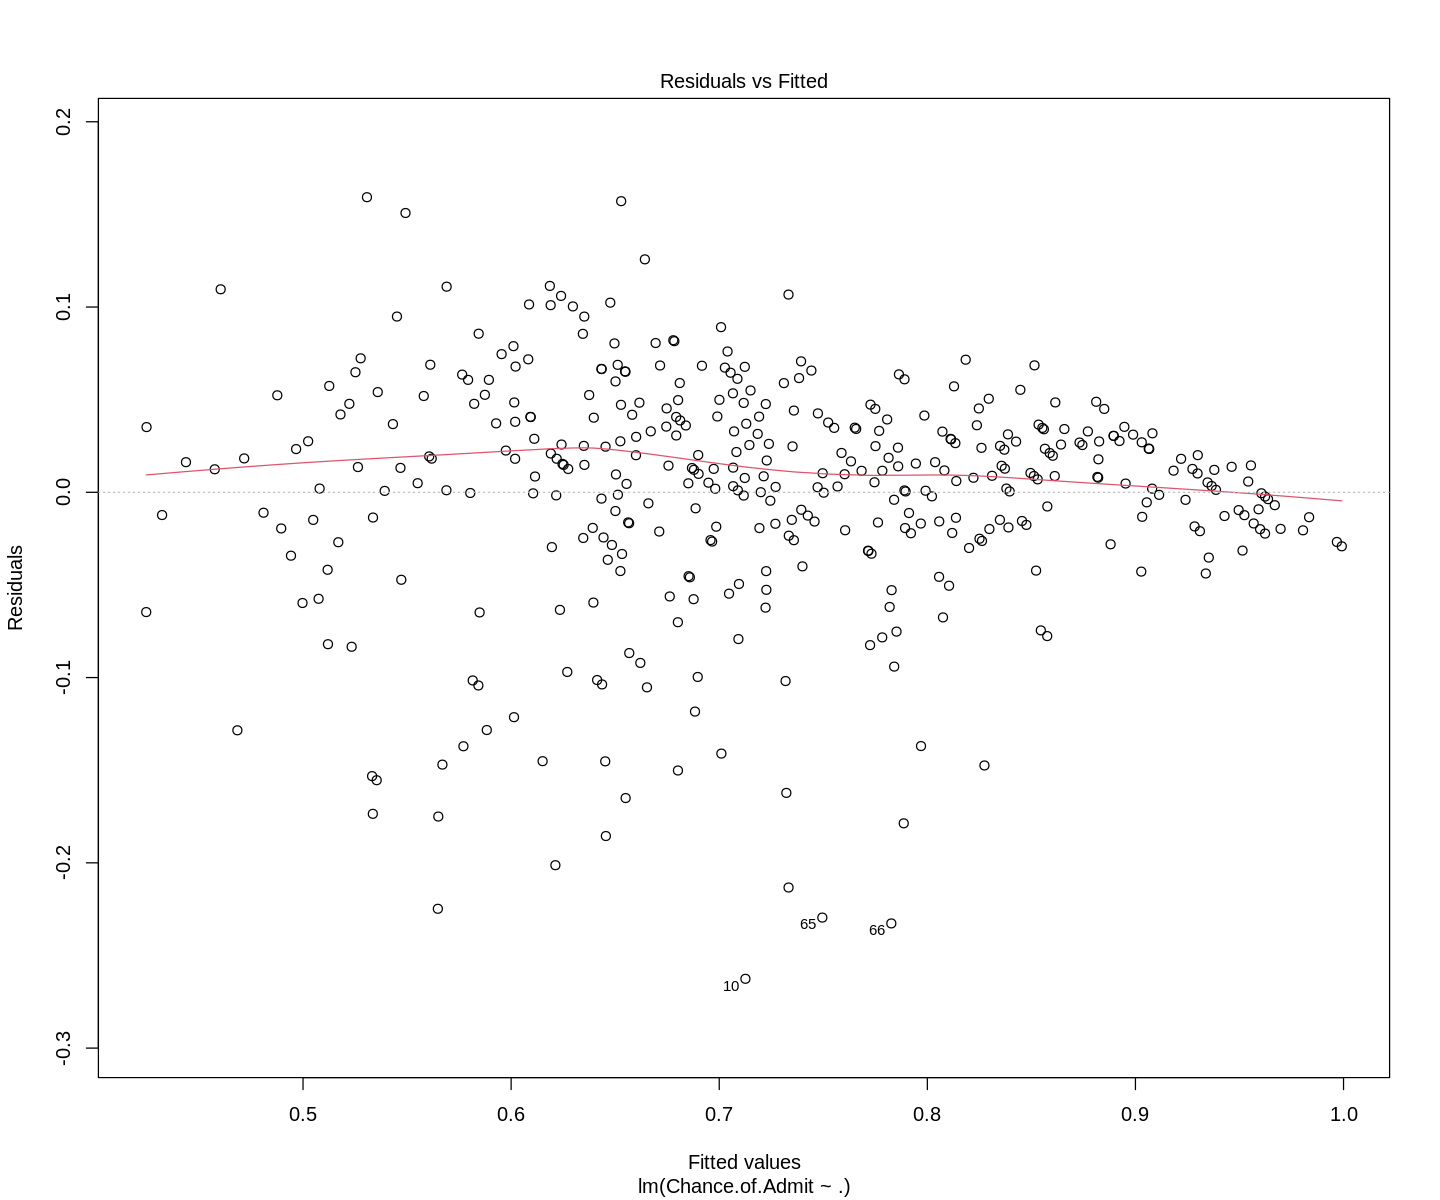

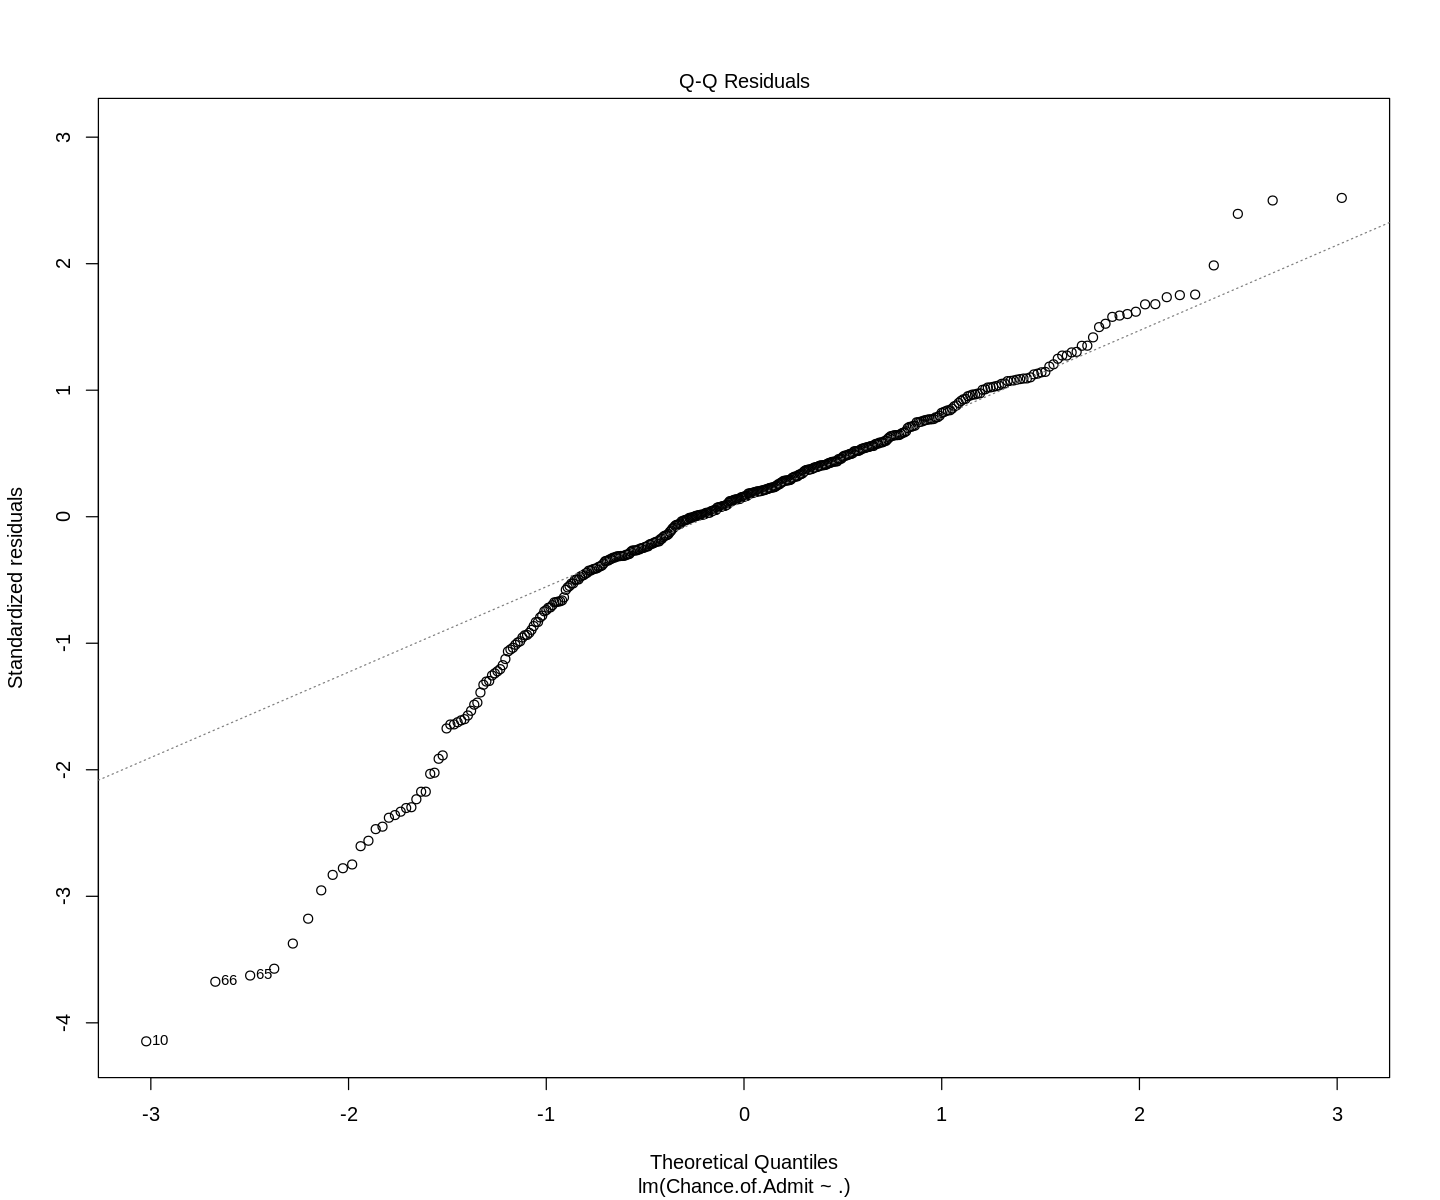

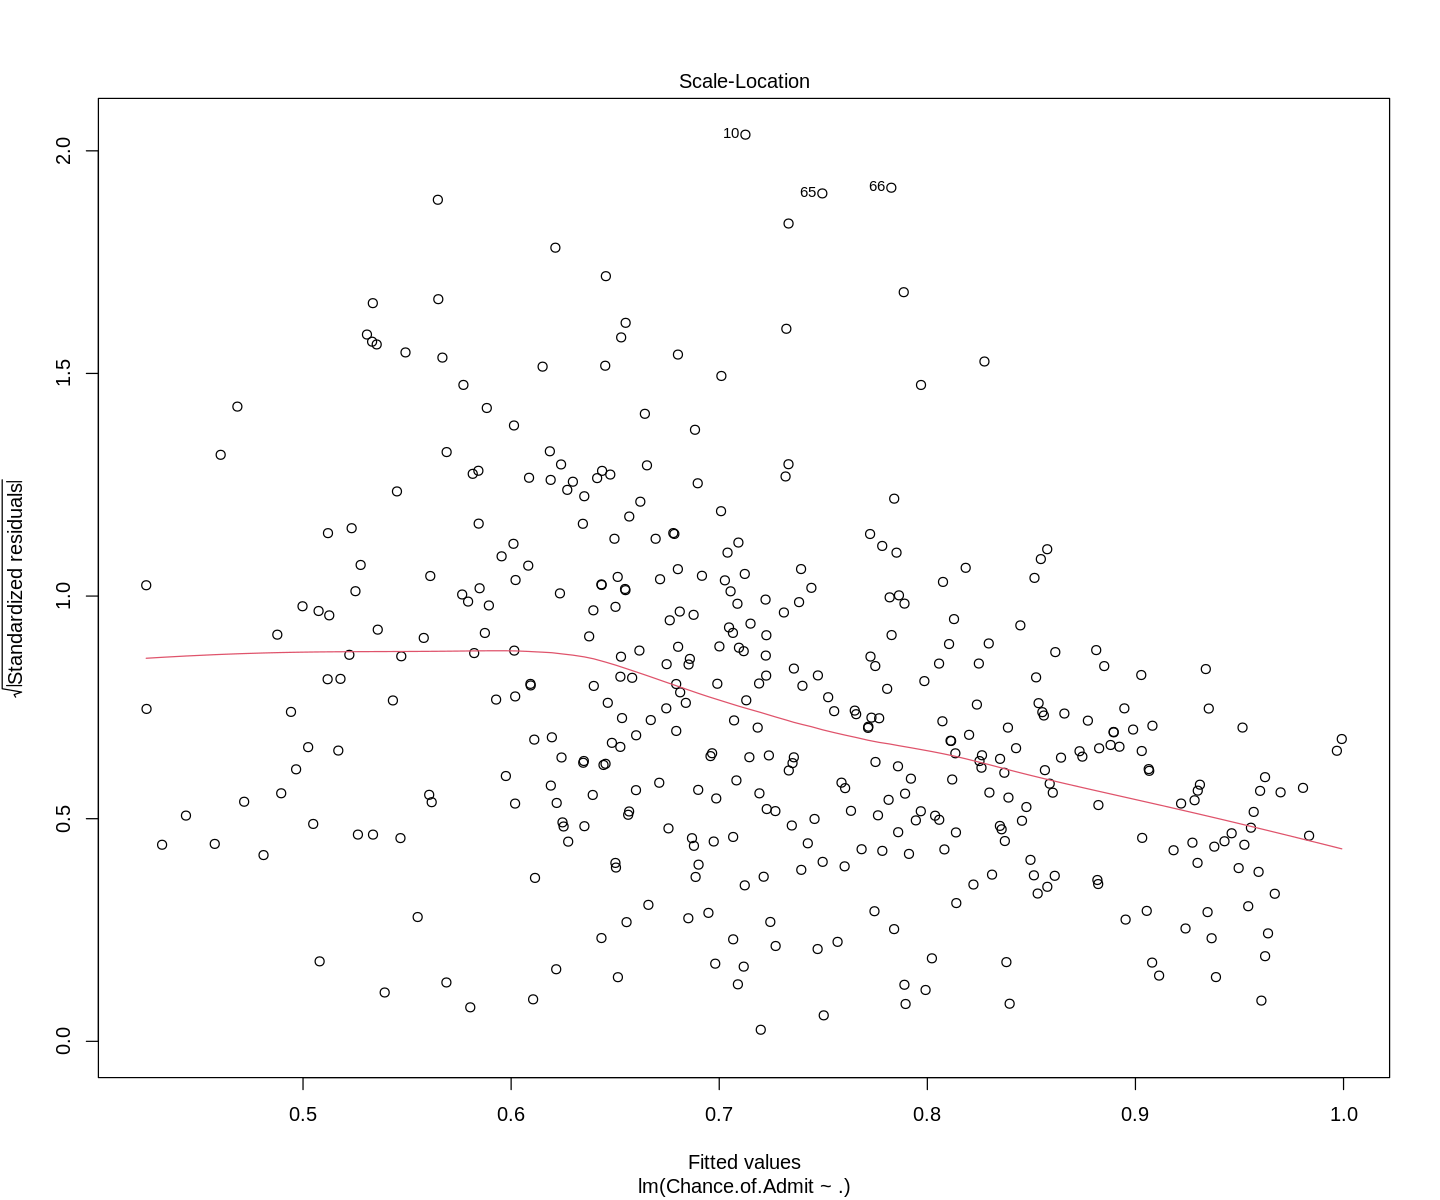

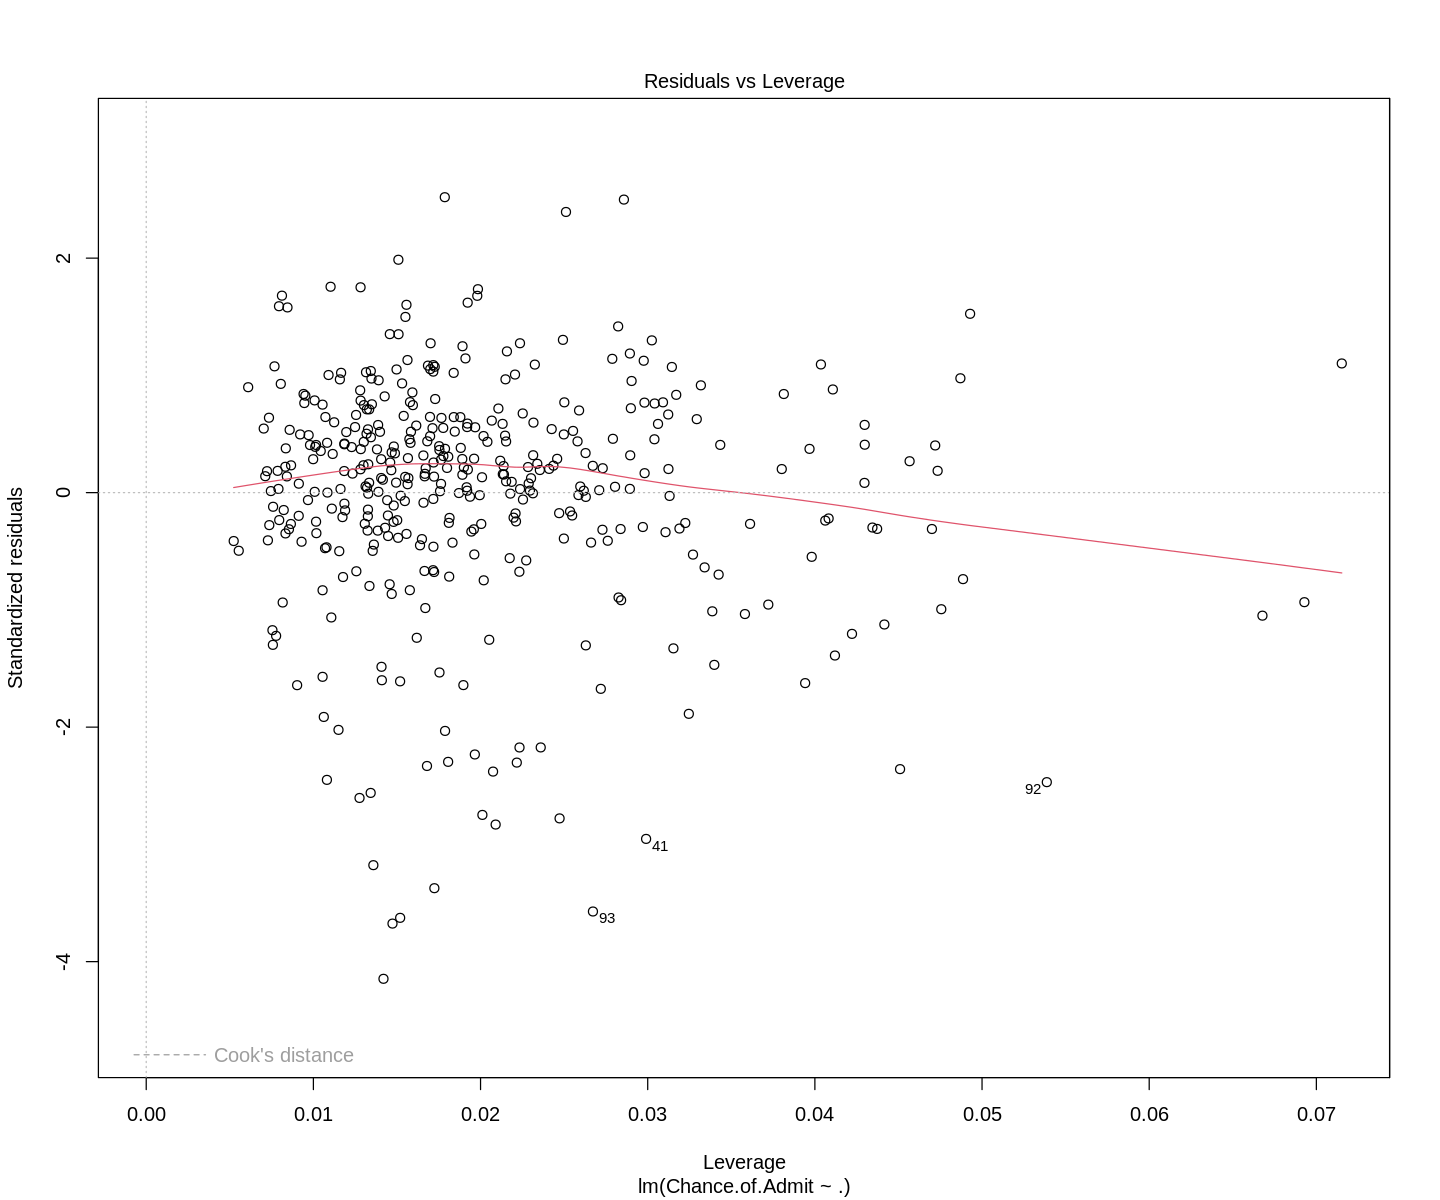

In [ ]:
plot(mlr)

**MLR Diagnostics:**
**Constant Variance**: The residuals vs fitted graph shows a scatterplot showing the residuals on the Y-axis and the fitted values on X-axis. Here we see all the residuals and fitted values are not distributed properly. This plot suggest that the model violates the assumption of Constant Variance. <br>

**Normality**: The QQ plot suggests that this model violates the assumption of Normality. This plot suggest that there is more variance than you would expect in a normal distribution. Also there are some outliers present in the dataset.

**Scale Location Plot**: This plot shows if the residuals are spread equally along with the ranges of predictors. From this plot we can also check the assumption of **Equal Variance**. The above plot shows the the residuals appear to be not randomly spreaded accorss the the line. There is no horizantal line and the points are following the line. This model violates the assumption of contant variance.

**Residuals vs Leverage**: This plots allows us to identify influential points i.e. outliers. As we can see there are a lot of influential points. An assumption would be if we remove them we may be able to see a good model through the MLR plots.

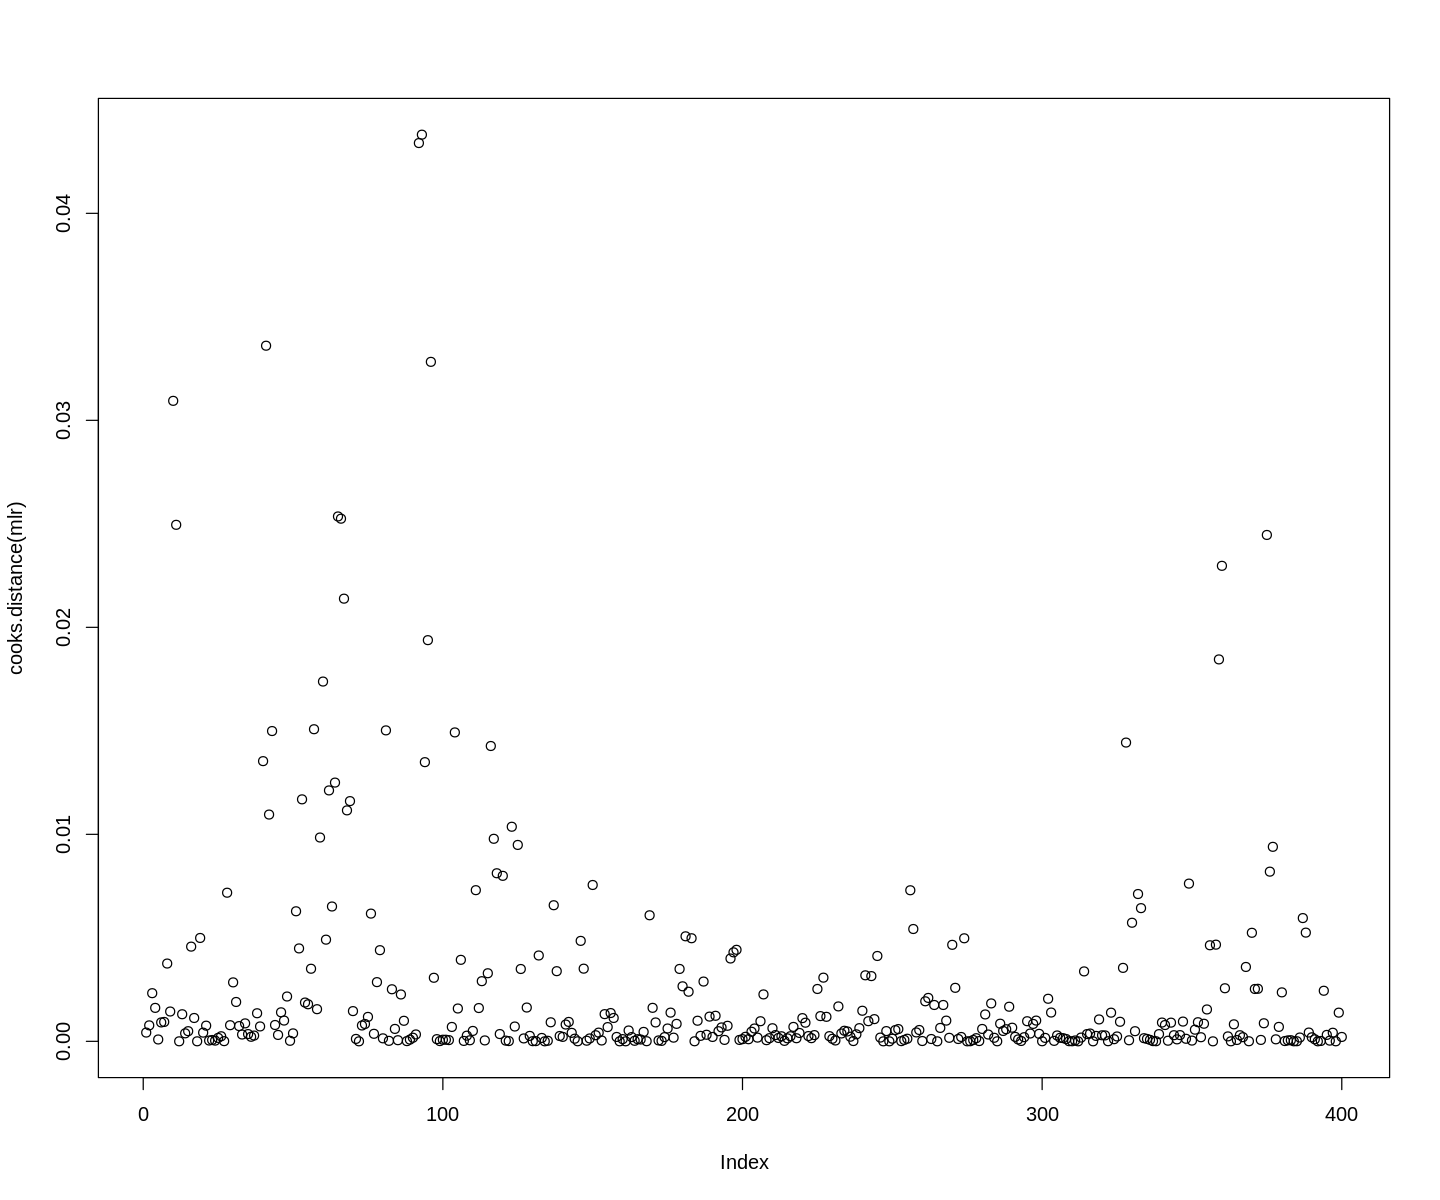

In [ ]:
plot(cooks.distance(mlr))

In [ ]:
cooks_distance <- cooks.distance(mlr)
cooks_distance

1            2            3            4            5            6 
4.233377e-04 7.714387e-04 2.326525e-03 1.616211e-03 8.970953e-05 9.126777e-04 
           7            8            9           10           11           12 
9.369100e-04 3.758213e-03 1.440461e-03 3.094163e-02 2.495226e-02 9.984538e-07 
          13           14           15           16           17           18 
1.308739e-03 3.861643e-04 4.908628e-04 4.575411e-03 1.128146e-03 1.428867e-06 
          19           20           21           22           23           24 
4.993771e-03 4.203535e-04 7.570207e-04 3.887244e-05 6.433590e-05 3.525665e-05 
          25           26           27           28           29           30 
1.653648e-04 2.450227e-04 8.987280e-06 7.180008e-03 7.794137e-04 2.848222e-03 
          31           32           33           34           35           36 
1.901487e-03 7.367905e-04 3.289353e-04 8.668936e-04 3.510966e-04 2.200628e-04 
          37           38           39           40           41           42 
2.792103e-04 1.356290e-03 7.193882e-04 1.353604e-02 3.360479e-02 1.095558e-02 
          43           44           45           46           47           48 
1.498995e-02 7.893580e-04 3.092213e-04 1.401896e-03 1.003509e-03 2.165564e-03 
          49           50           51           52           53           54 
2.556773e-05 3.844565e-04 6.282944e-03 4.488443e-03 1.169015e-02 1.874248e-03 
          55           56           57           58           59           60 
1.790169e-03 3.506918e-03 1.507719e-02 1.552986e-03 9.846292e-03 1.738083e-02 
          61           62           63           64           65           66 
4.912012e-03 1.212119e-02 6.513919e-03 1.249986e-02 2.535688e-02 2.524888e-02 
          67           68           69           70           71           72 
2.138528e-02 1.115754e-02 1.160504e-02 1.460494e-03 1.167234e-04 1.947292e-07 
          73           74           75           76           77           78 
7.650802e-04 8.378135e-04 1.180449e-03 6.170629e-03 3.641147e-04 2.860351e-03 
          79           80           81           82           83           84 
4.404325e-03 1.444380e-04 1.502188e-02 2.367410e-05 2.515121e-03 6.001571e-04 
          85           86           87           88           89           90 
5.467708e-05 2.263752e-03 9.928564e-04 1.019594e-05 8.380702e-05 1.754040e-04 
          91           92           93           94           95           96 
3.327850e-04 4.339536e-02 4.380038e-02 1.348707e-02 1.938094e-02 3.282531e-02 
          97           98           99          100          101          102 
3.070657e-03 1.059885e-04 1.254464e-05 7.866960e-05 7.799906e-05 5.922747e-05 
         103          104          105          106          107          108 
6.953029e-04 1.492338e-02 1.586124e-03 3.937347e-03 2.026673e-05 2.736788e-04 
         109          110          111          112          113          114 
5.082295e-05 5.027414e-04 7.302826e-03 1.608378e-03 2.906158e-03 4.435919e-05 
         115          116          117          118          119          120 
3.288806e-03 1.426724e-02 9.784805e-03 8.119576e-03 3.516468e-04 7.995006e-03 
         121          122          123          124          125          126 
3.450564e-05 1.198769e-05 1.036668e-02 7.156351e-04 9.488020e-03 3.494630e-03 
         127          128          129          130          131          132 
1.403937e-04 1.632511e-03 2.625768e-04 7.544891e-06 9.963784e-06 4.147028e-03 
         133          134          135          136          137          138 
1.635114e-04 8.752228e-07 2.775563e-05 9.198188e-04 6.575009e-03 3.389271e-03 
         139          140          141          142          143          144 
2.577332e-04 2.152850e-04 8.114410e-04 9.381831e-04 4.096557e-04 1.276535e-04 
         145          146          147          148          149          150 
2.982446e-06 4.852926e-03 3.510935e-03 3.062395e-05 1.392671e-04 7.553210e-03 
         151          152          153          154          

In [ ]:
threshold <- 0.00099
influence_points <- which(cooks_distance > threshold)
cleaned_data <- stud[-influence_points, ]
cleaned_data

,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90
7,321,109,3,3.0,4.0,8.20,1,0.75
12,327,111,4,4.0,4.5,9.00,1,0.84
14,307,109,3,4.0,3.0,8.00,1,0.62
15,311,104,3,3.5,2.0,8.20,1,0.61
18,319,106,3,4.0,3.0,8.00,1,0.65


In [ ]:
clean_model <- lm(Chance.of.Admit ~ ., data = cleaned_data)

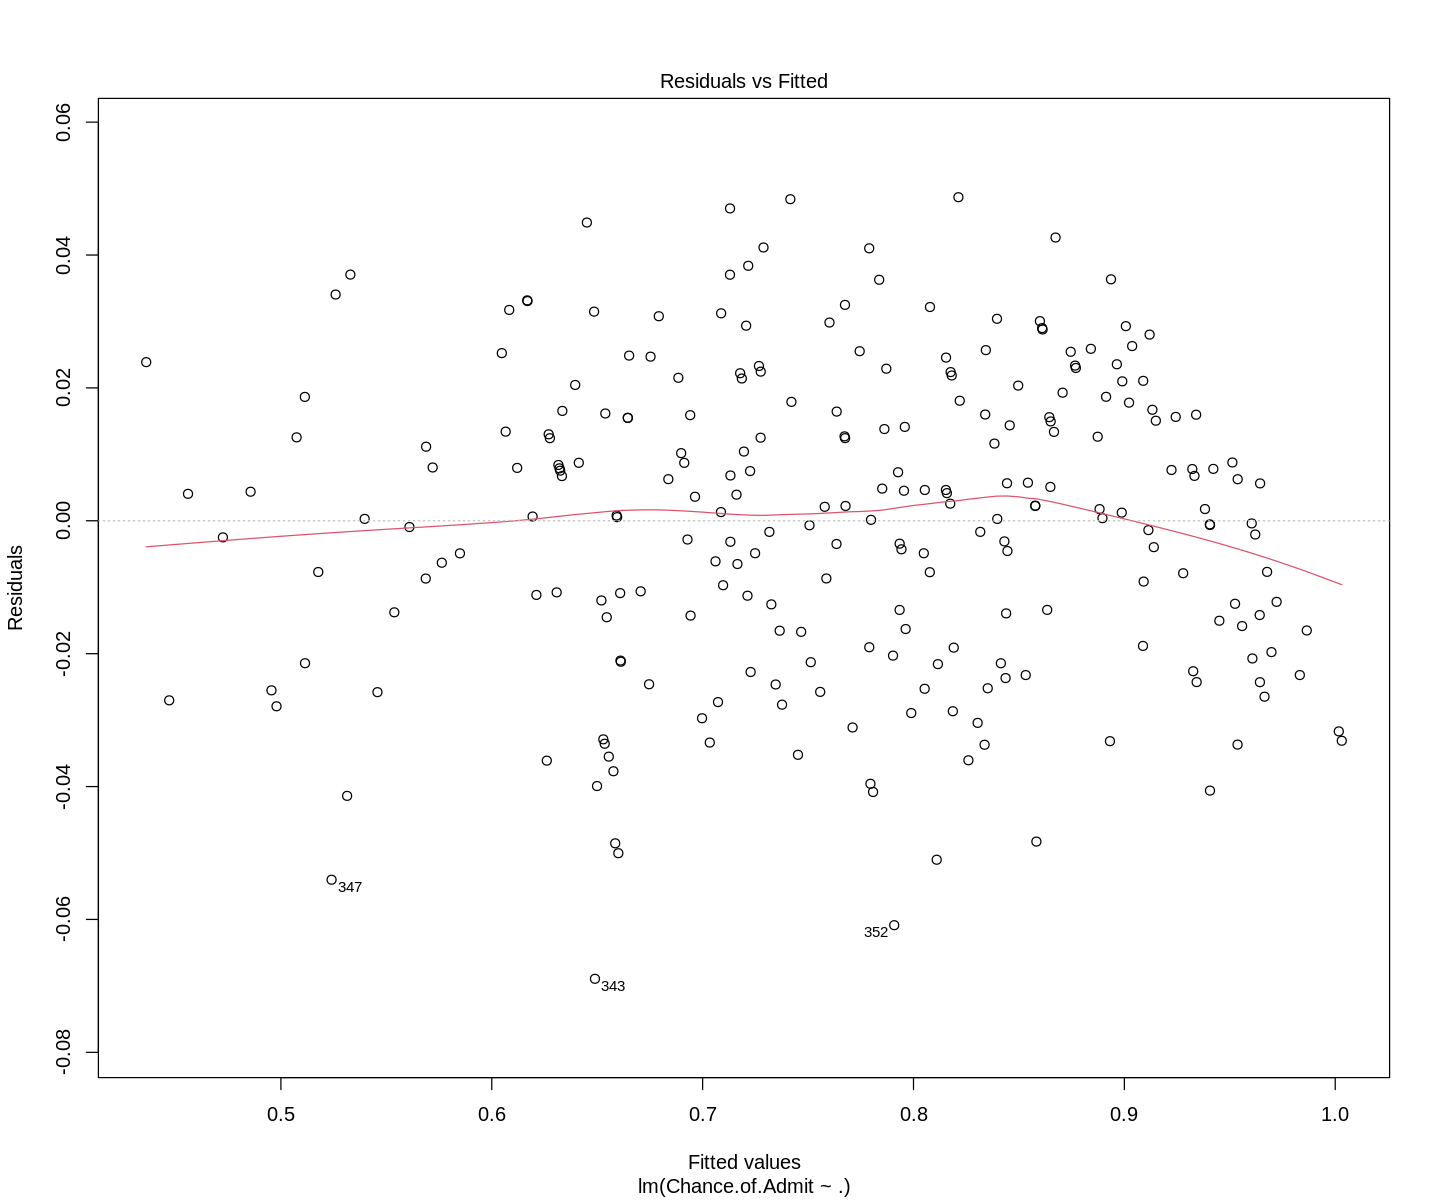

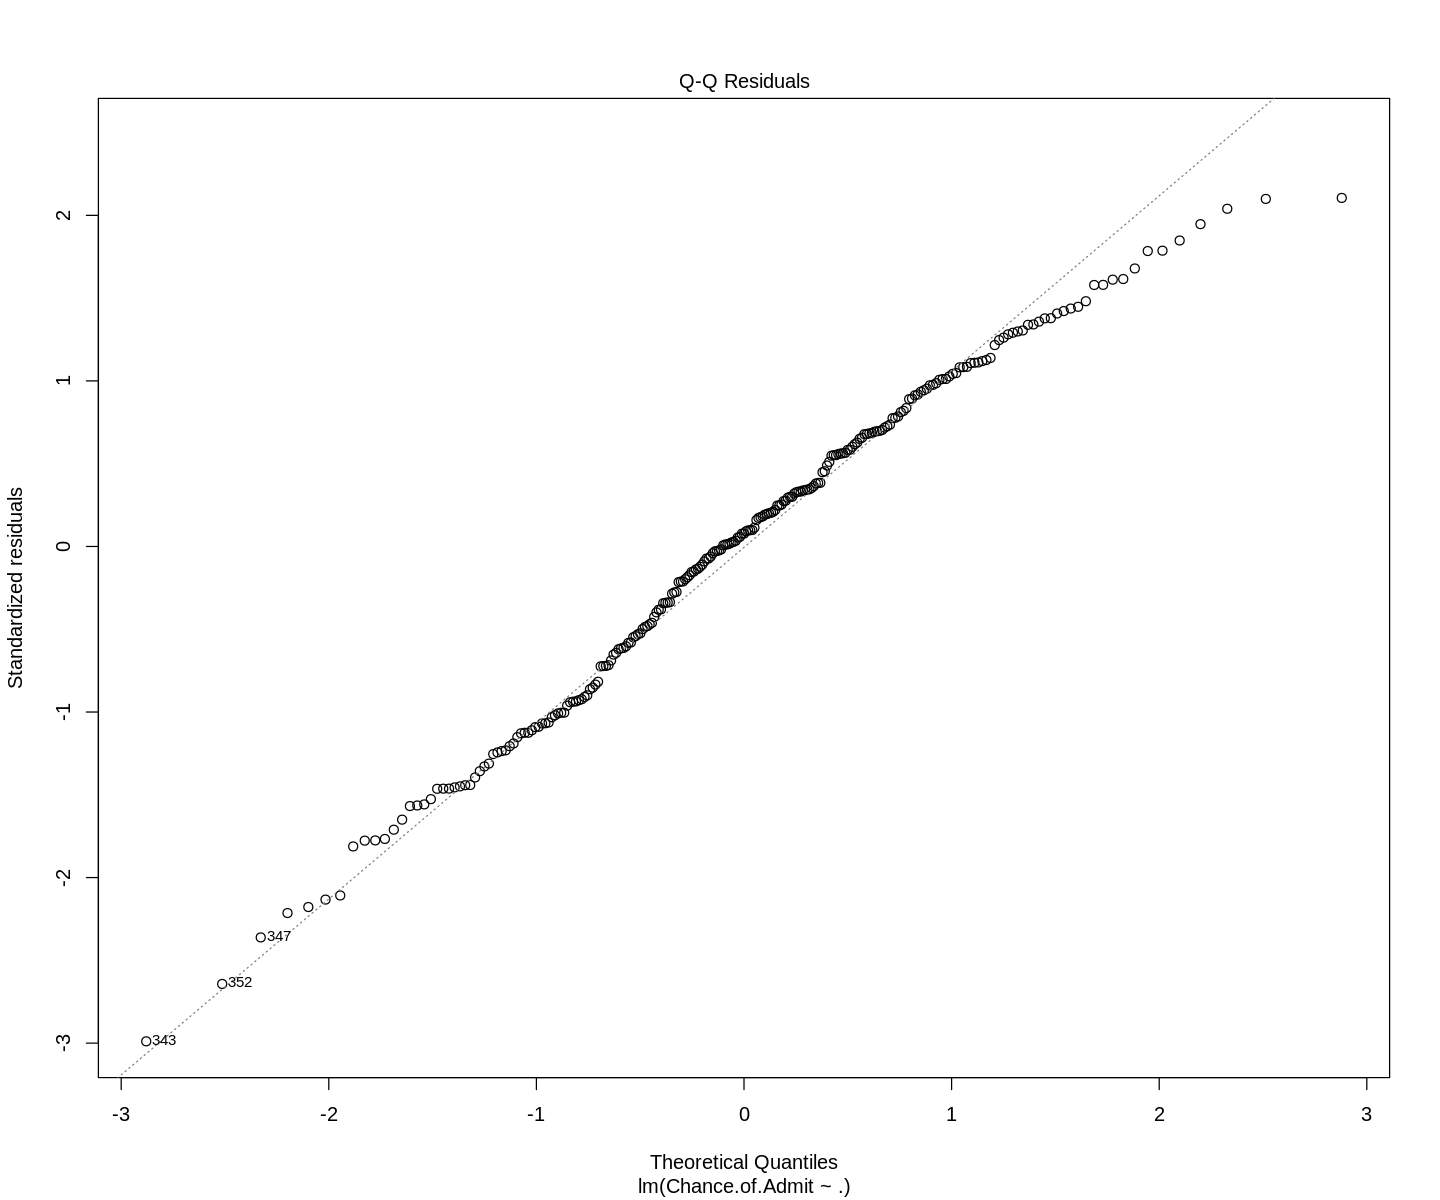

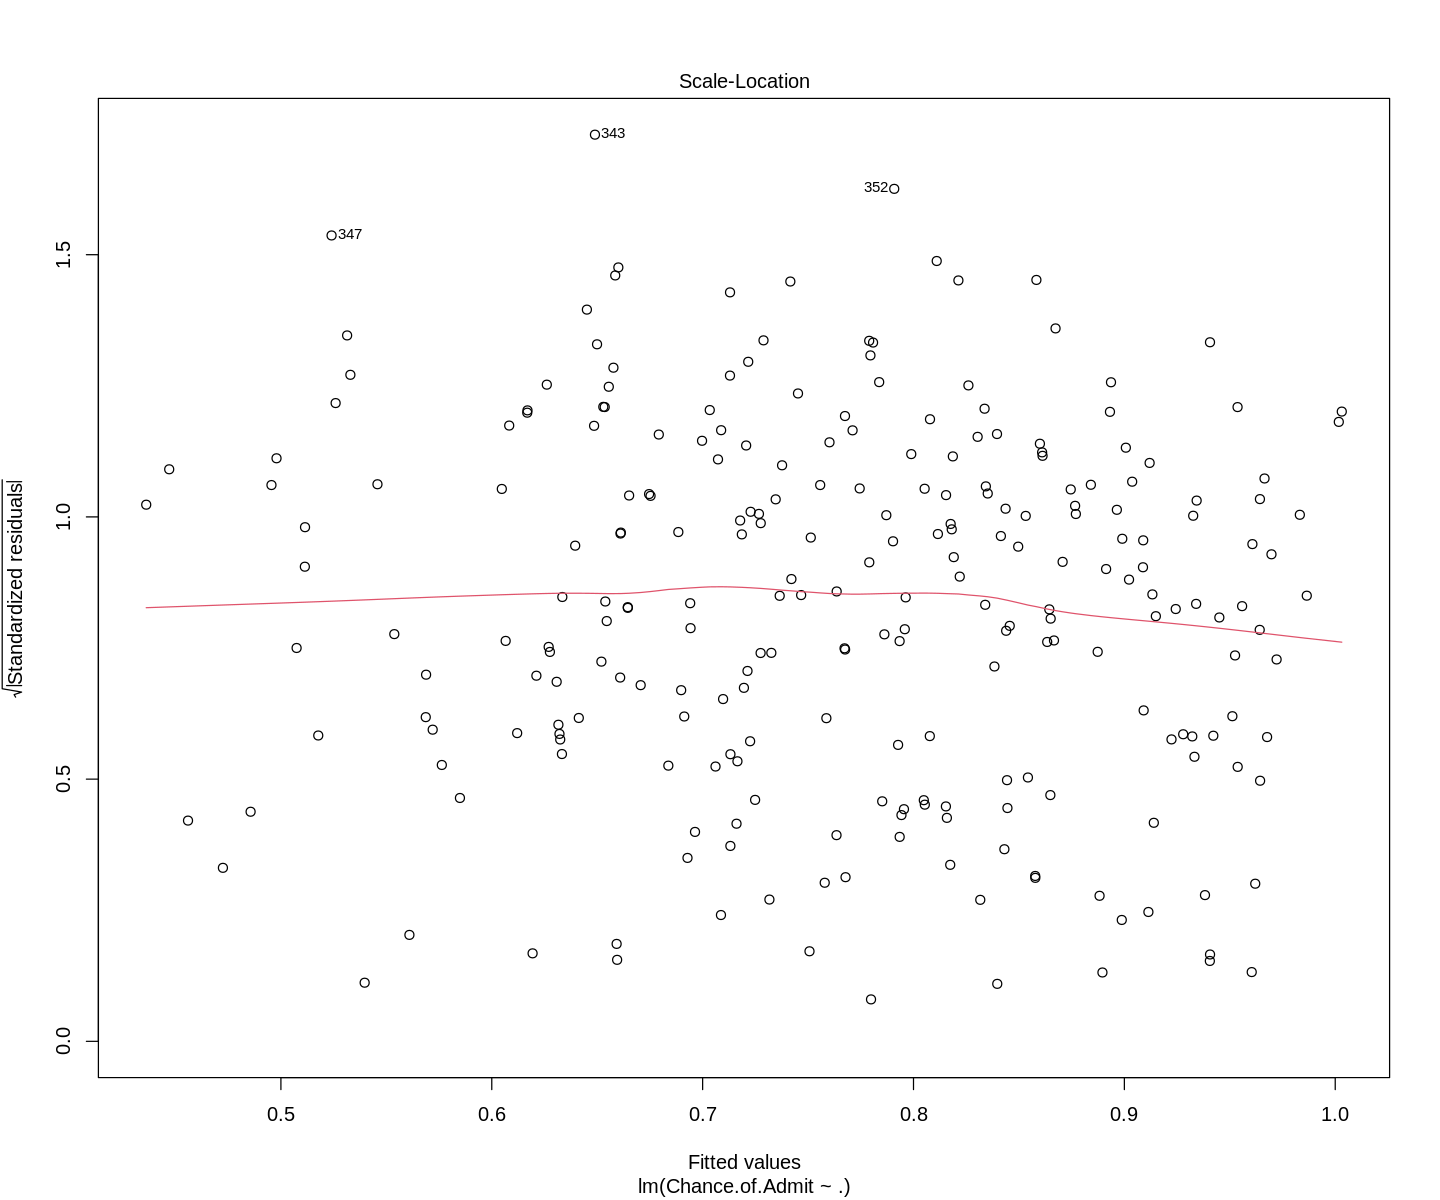

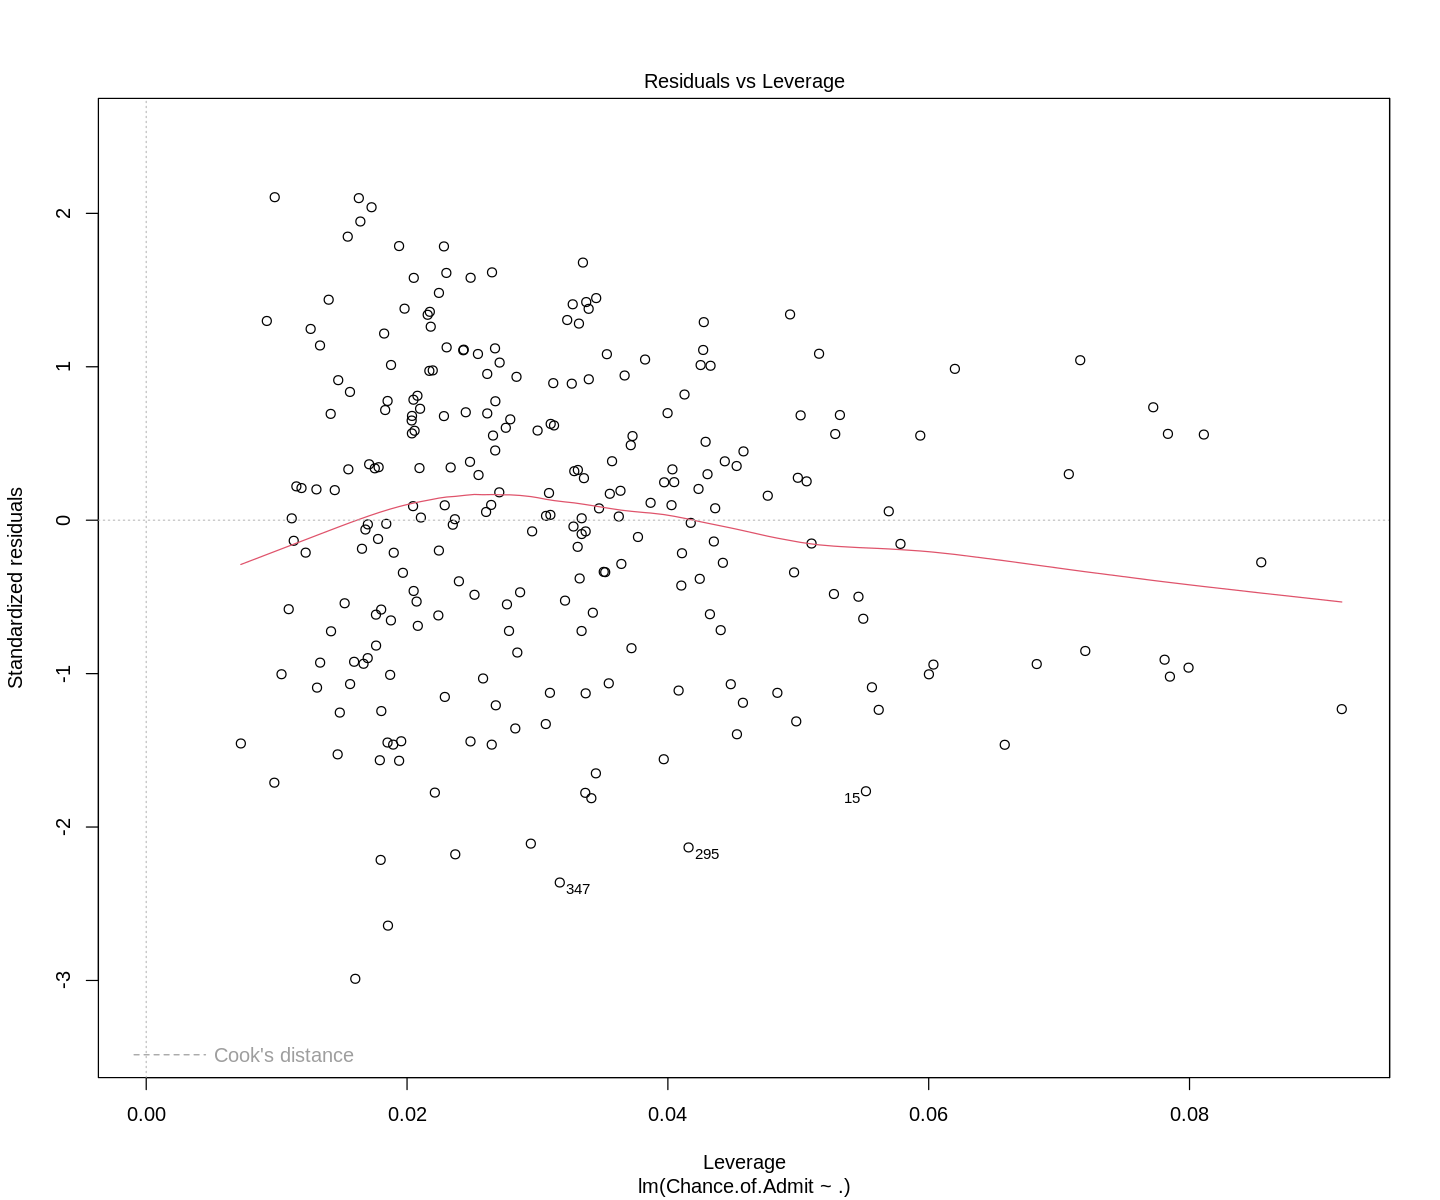

In [ ]:
plot(clean_model)

After Removing some of the value from the cooks distance that we assumed were affecting the model. There are several improvements in the diagnostic plots. But the still the model is not good.

**Model Selection**

In [ ]:
library(leaps)
library(MASS)

n = dim(stud)[1];
reg1 =  regsubsets(Chance.of.Admit ~ ., data = train)
rs = summary(reg1)
rs$which

,(Intercept),GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
2,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
3,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
4,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
5,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE
6,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
7,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


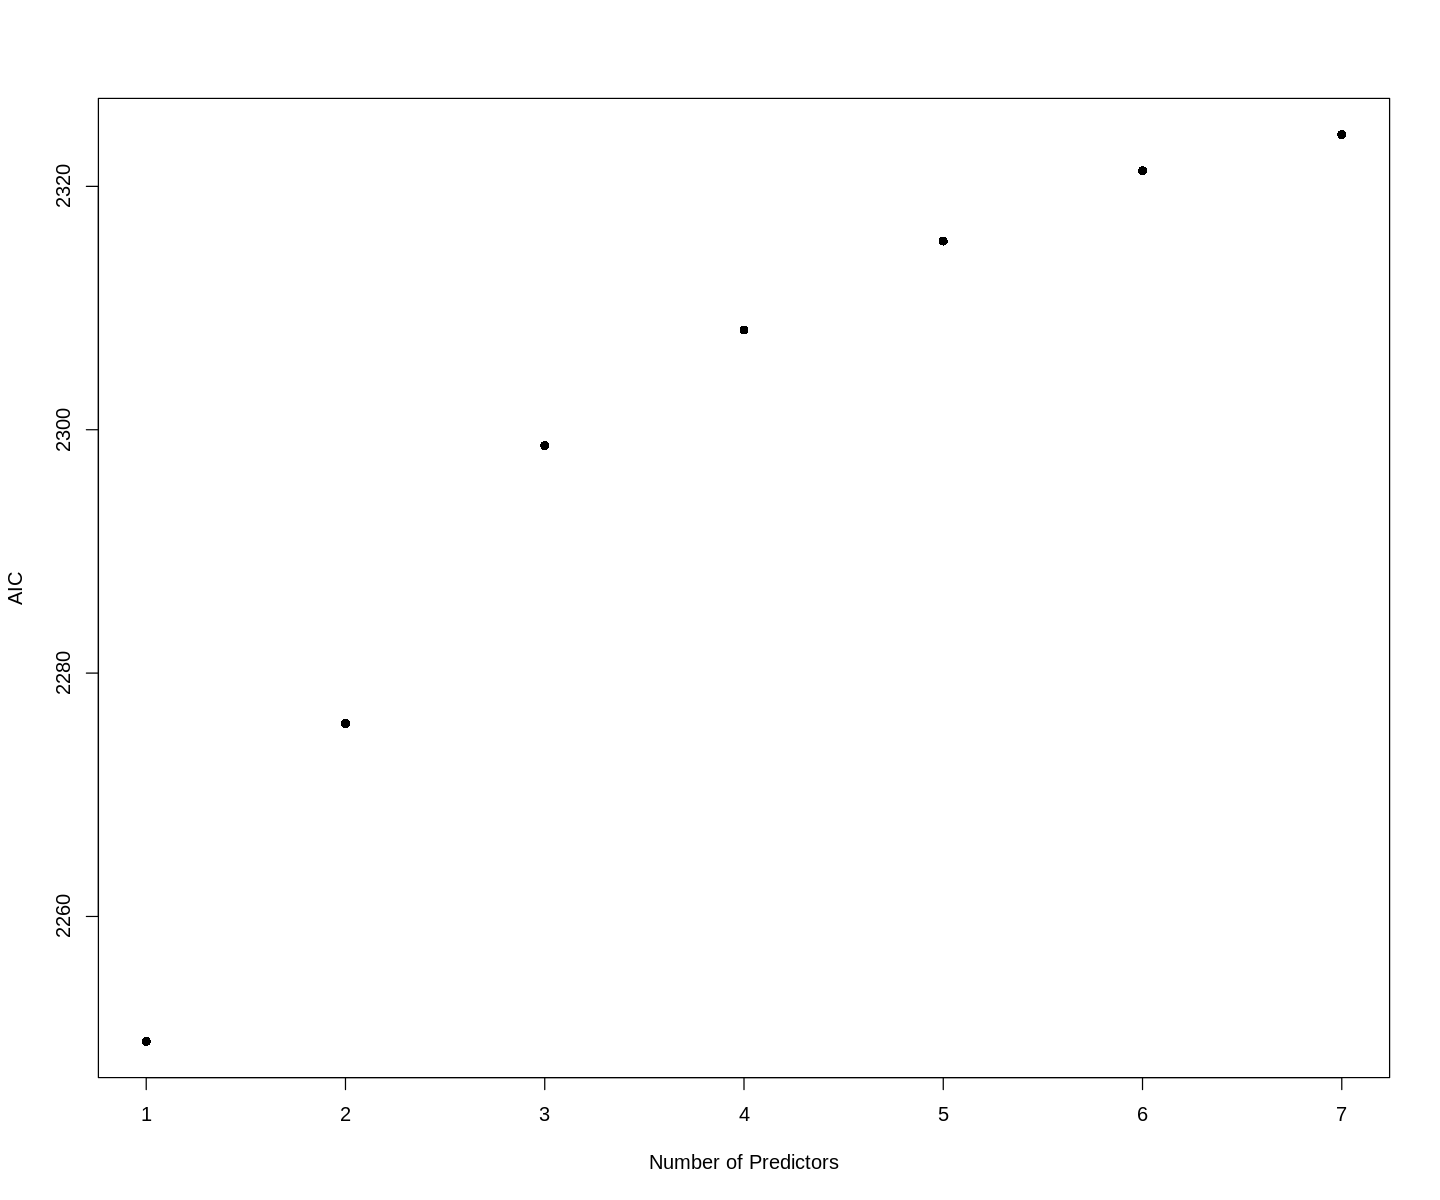

In [ ]:
AIC = 2*(2:8) - n*log(rs$rss/n)
plot(AIC ~ I(1:7), pch = 16, xlab = "Number of Predictors", ylab = "AIC")

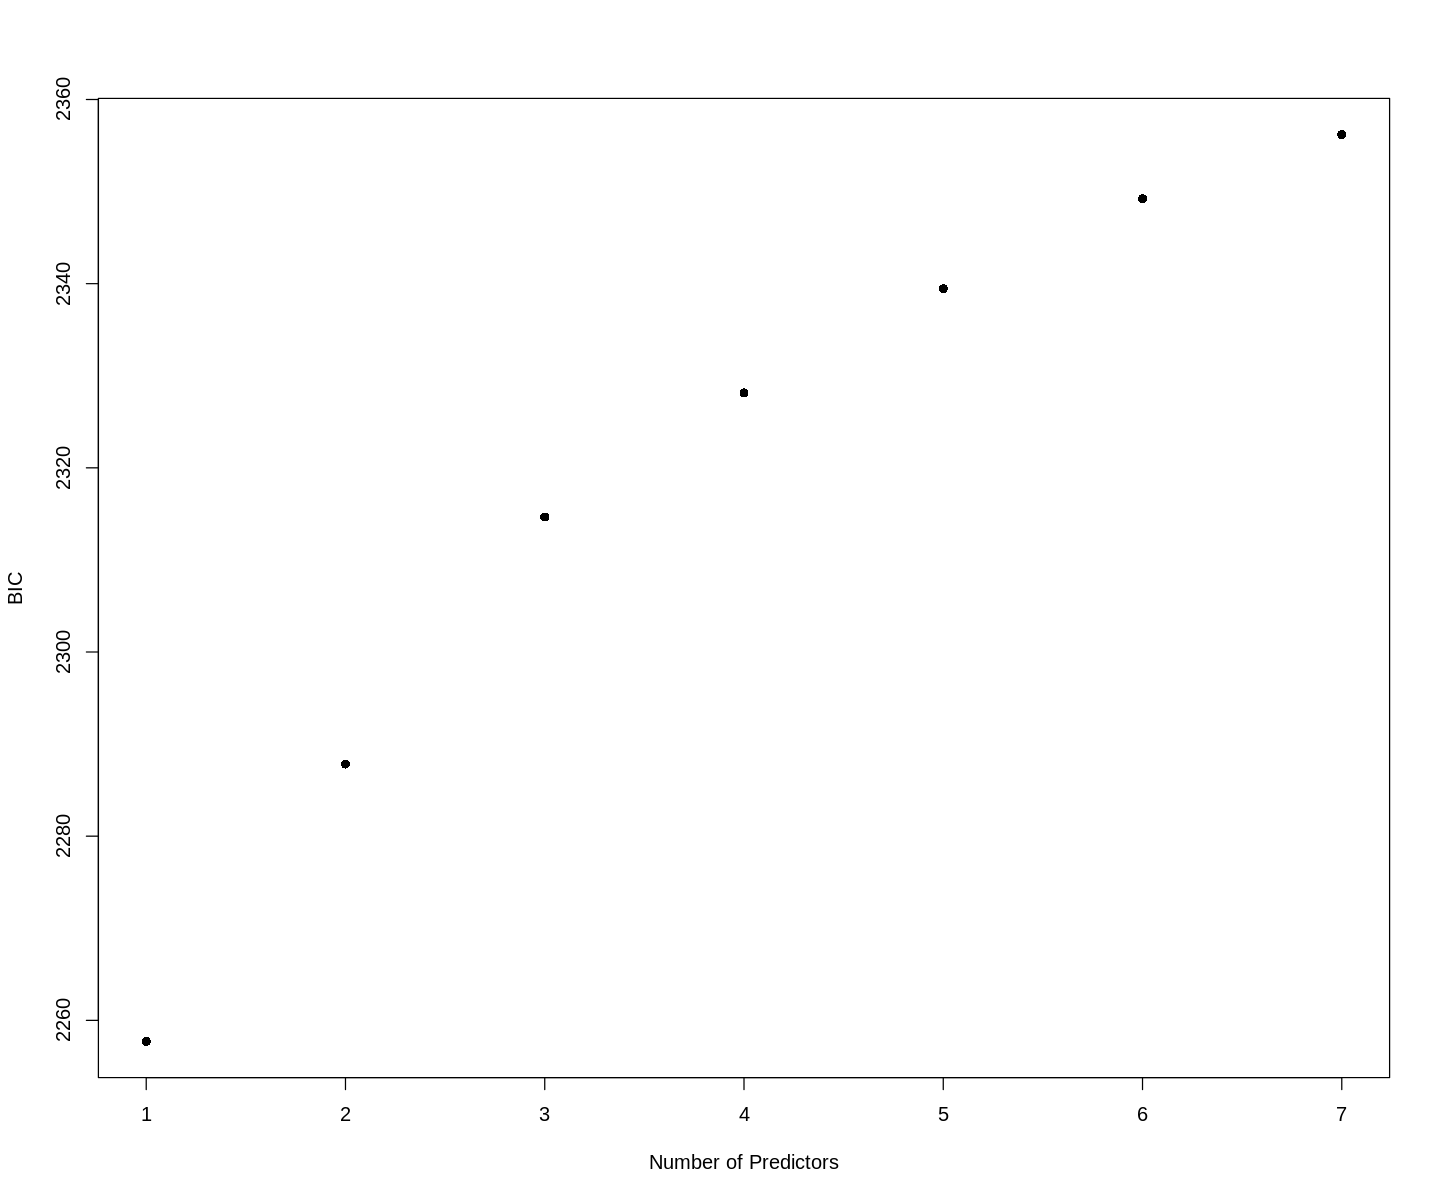

In [ ]:
BIC = log(n)*(2:8) - n*log(rs$rss/n)
plot(BIC ~ I(1:7), pch = 16, xlab = "Number of Predictors", ylab = "BIC")

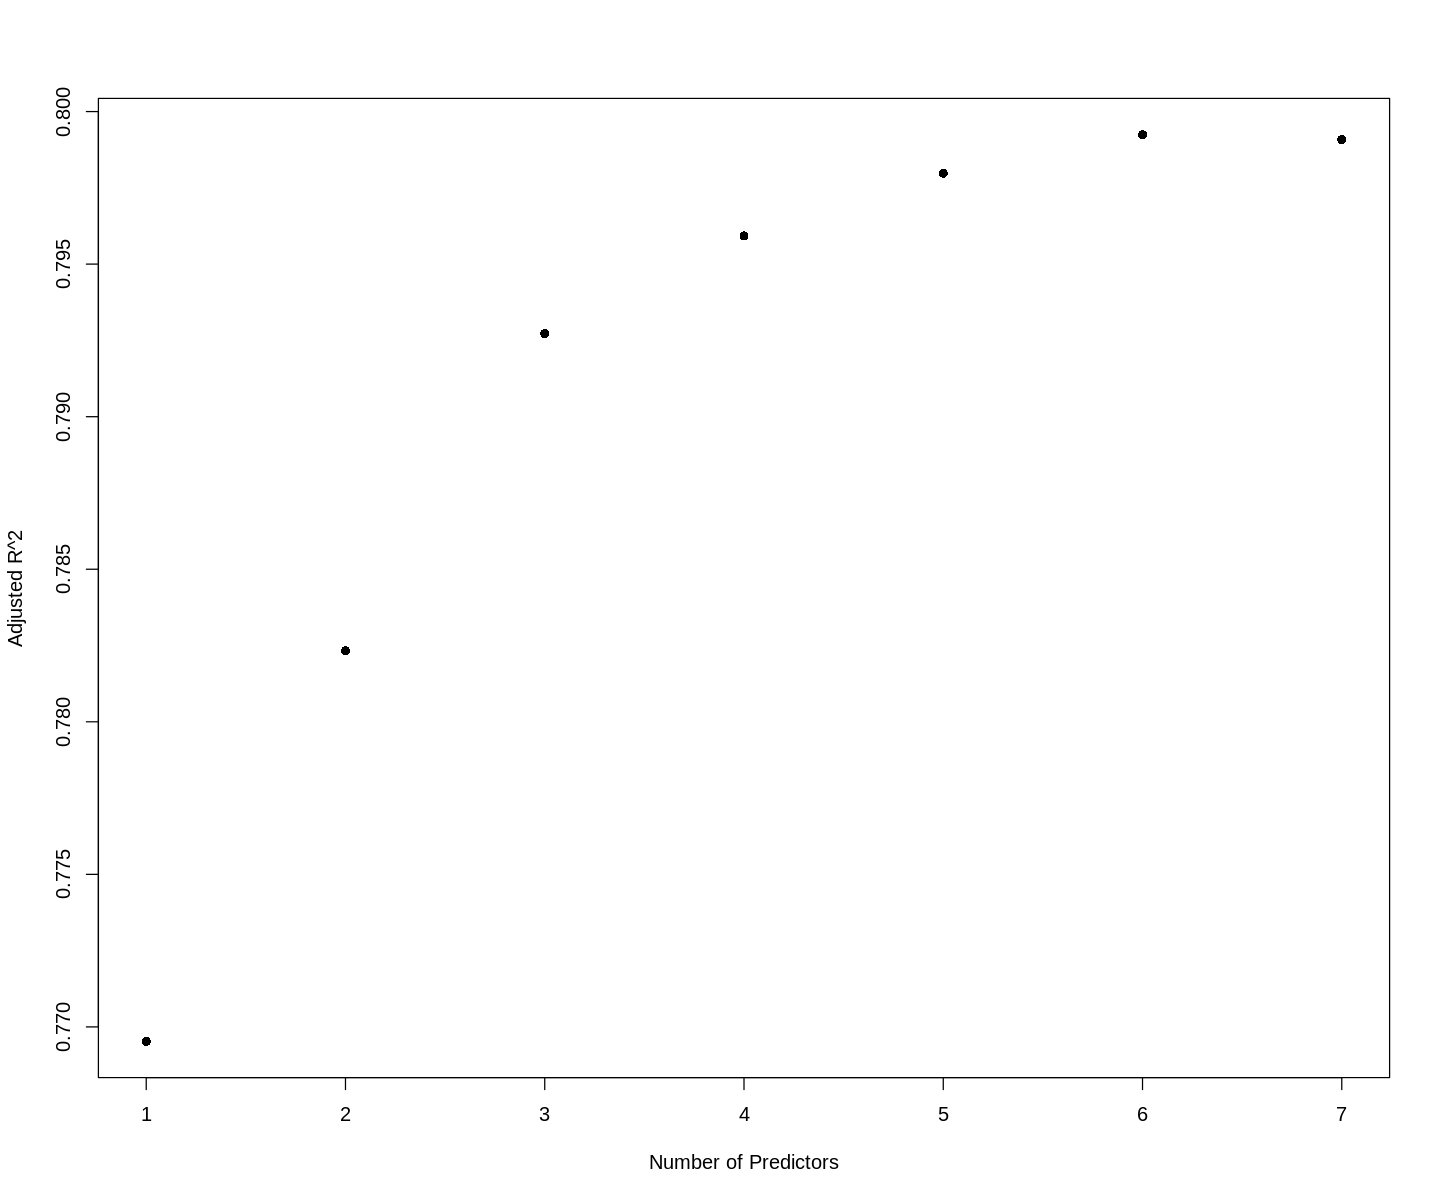

In [ ]:
plot(1:7, rs$adjr2, pch = 16, xlab = "Number of Predictors", ylab = "Adjusted R^2", bg = 1)

From the above plots <br>
**AIC** suggest the model with 1 predictor is the best model <br>
**BIC** suggest the model with 1 predictor is the best model <br>
**Adjusted $R^2$** suggest the model with 6 predictor is the best model <br>

In [ ]:
m1 <- lm(Chance.of.Admit ~ CGPA, data = train)
summary(m1)
m1_pred <- predict(m1, test)
mspe <- mean((test$Chance.of.Admit - m1_pred)^2)
cat("MSPE for model with 1 predictor: ", mspe)


Call:
lm(formula = Chance.of.Admit ~ CGPA, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.268069 -0.030725  0.008337  0.042190  0.172936 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.059807   0.054767  -19.35   <2e-16 ***
CGPA         0.207706   0.006361   32.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06771 on 318 degrees of freedom
Multiple R-squared:  0.7702,	Adjusted R-squared:  0.7695 
F-statistic:  1066 on 1 and 318 DF,  p-value: < 2.2e-16


MSPE for model with 1 predictor:  0.005870937

In [ ]:
m2 <- lm(Chance.of.Admit ~ GRE.Score + CGPA , data = train)
summary(m2)
m2_pred <- predict(m2, test)
mspe <- mean((test$Chance.of.Admit - m2_pred)^2)
cat("MSPE for model with 2 predictors: ", mspe)


Call:
lm(formula = Chance.of.Admit ~ GRE.Score + CGPA, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.244947 -0.026518  0.007322  0.040008  0.144024 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.5409273  0.1207568 -12.761  < 2e-16 ***
GRE.Score    0.0026573  0.0005987   4.439 1.25e-05 ***
CGPA         0.1657746  0.0112900  14.683  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06581 on 317 degrees of freedom
Multiple R-squared:  0.7837,	Adjusted R-squared:  0.7823 
F-statistic: 574.3 on 2 and 317 DF,  p-value: < 2.2e-16


MSPE for model with 2 predictors:  0.0051003

In [ ]:
m3 <- lm(Chance.of.Admit ~ GRE.Score + LOR + CGPA, data = train)
summary(m3)
m3_pred <- predict(m3, test)
mspe <- mean((test$Chance.of.Admit - m3_pred)^2)
cat("MSPE for model with 3 predictors: ", mspe)


Call:
lm(formula = Chance.of.Admit ~ GRE.Score + LOR + CGPA, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.244463 -0.025662  0.007405  0.037291  0.159975 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.4247972  0.1211768 -11.758  < 2e-16 ***
GRE.Score    0.0026743  0.0005842   4.577 6.78e-06 ***
LOR          0.0221564  0.0053898   4.111 5.03e-05 ***
CGPA         0.1426977  0.0123648  11.541  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06422 on 316 degrees of freedom
Multiple R-squared:  0.7947,	Adjusted R-squared:  0.7927 
F-statistic: 407.7 on 3 and 316 DF,  p-value: < 2.2e-16


MSPE for model with 3 predictors:  0.004649701

In [ ]:
m4 <- lm(Chance.of.Admit ~ GRE.Score + TOEFL.Score + LOR + CGPA, data = train)
summary(m4)
m4_pred <- predict(m4, test)
mspe <- mean((test$Chance.of.Admit - m4_pred)^2)
cat("MSPE for model with 4 predictors: ", mspe)


Call:
lm(formula = Chance.of.Admit ~ GRE.Score + TOEFL.Score + LOR + 
    CGPA, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.246727 -0.023305  0.009569  0.037931  0.152923 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.4017796  0.1206054 -11.623  < 2e-16 ***
GRE.Score    0.0019554  0.0006502   3.007  0.00285 ** 
TOEFL.Score  0.0028580  0.0011705   2.442  0.01516 *  
LOR          0.0215339  0.0053540   4.022 7.23e-05 ***
CGPA         0.1310809  0.0131590   9.961  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06372 on 315 degrees of freedom
Multiple R-squared:  0.7985,	Adjusted R-squared:  0.7959 
F-statistic:   312 on 4 and 315 DF,  p-value: < 2.2e-16


MSPE for model with 4 predictors:  0.004573236

In [ ]:
m5 <- lm(Chance.of.Admit ~ GRE.Score + TOEFL.Score + LOR + CGPA + Research, data = train)
summary(m5)
m5_pred <- predict(m5, test)
mspe <- mean((test$Chance.of.Admit - m5_pred)^2)
cat("MSPE for model with 5 predictors: ", mspe)


Call:
lm(formula = Chance.of.Admit ~ GRE.Score + TOEFL.Score + LOR + 
    CGPA + Research, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.236189 -0.022586  0.008971  0.035879  0.152348 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.2829709  0.1332794  -9.626  < 2e-16 ***
GRE.Score    0.0015601  0.0006751   2.311 0.021475 *  
TOEFL.Score  0.0029127  0.0011649   2.500 0.012912 *  
LOR          0.0204173  0.0053549   3.813 0.000165 ***
CGPA         0.1304533  0.0130963   9.961  < 2e-16 ***
Research     0.0178436  0.0087107   2.048 0.041345 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0634 on 314 degrees of freedom
Multiple R-squared:  0.8011,	Adjusted R-squared:  0.798 
F-statistic:   253 on 5 and 314 DF,  p-value: < 2.2e-16


MSPE for model with 5 predictors:  0.004336164

In [ ]:
m6 <- lm(Chance.of.Admit ~ GRE.Score + TOEFL.Score + University.Rating + LOR + CGPA + Research, data = train)
summary(m6)
m6_pred <- predict(m6, test)
mspe <- mean((test$Chance.of.Admit - m6_pred)^2)
cat("MSPE for model with 6 predictors: ", mspe)


Call:
lm(formula = Chance.of.Admit ~ GRE.Score + TOEFL.Score + University.Rating + 
    LOR + CGPA + Research, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.235752 -0.022263  0.009728  0.034455  0.150351 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.211653   0.139143  -8.708  < 2e-16 ***
GRE.Score          0.001575   0.000673   2.340  0.01991 *  
TOEFL.Score        0.002531   0.001182   2.141  0.03305 *  
University.Rating  0.008516   0.004935   1.725  0.08544 .  
LOR                0.017463   0.005606   3.115  0.00201 ** 
CGPA               0.124615   0.013487   9.240  < 2e-16 ***
Research           0.016850   0.008703   1.936  0.05374 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0632 on 313 degrees of freedom
Multiple R-squared:  0.803,	Adjusted R-squared:  0.7992 
F-statistic: 212.7 on 6 and 313 DF,  p-value: < 2.2e-16


MSPE for model with 6 predictors:  0.004463663

In [ ]:
m7 <- lm(Chance.of.Admit ~ GRE.Score + TOEFL.Score + University.Rating + LOR + CGPA + Research + SOP, data = train)
summary(m7)
m7_pred <- predict(m7, test)
mspe <- mean((test$Chance.of.Admit - m7_pred)^2)
cat("MSPE for model with 7 predictors: ", mspe)


Call:
lm(formula = Chance.of.Admit ~ GRE.Score + TOEFL.Score + University.Rating + 
    LOR + CGPA + Research + SOP, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23430 -0.02243  0.01012  0.03560  0.15120 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.2231196  0.1398305  -8.747  < 2e-16 ***
GRE.Score          0.0015538  0.0006737   2.306  0.02175 *  
TOEFL.Score        0.0026440  0.0011898   2.222  0.02699 *  
University.Rating  0.0100314  0.0052398   1.914  0.05647 .  
LOR                0.0194513  0.0060620   3.209  0.00147 ** 
CGPA               0.1260544  0.0135947   9.272  < 2e-16 ***
Research           0.0172583  0.0087189   1.979  0.04865 *  
SOP               -0.0053018  0.0061357  -0.864  0.38820    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06322 on 312 degrees of freedom
Multiple R-squared:  0.8035,	Adjusted R-squared:  0.7991 
F-statistic: 18

MSPE for model with 7 predictors:  0.004496115

**After analyzing each Model the MSPE of the first model which only has CGPA Predictor value has the highest CGPA**

In [ ]:

library(mgcv)

glm_model <- glm(Chance.of.Admit ~., data = train)
summary(glm_model)


Call:
glm(formula = Chance.of.Admit ~ ., data = train)

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.2231196  0.1398305  -8.747  < 2e-16 ***
GRE.Score          0.0015538  0.0006737   2.306  0.02175 *  
TOEFL.Score        0.0026440  0.0011898   2.222  0.02699 *  
University.Rating  0.0100314  0.0052398   1.914  0.05647 .  
SOP               -0.0053018  0.0061357  -0.864  0.38820    
LOR                0.0194513  0.0060620   3.209  0.00147 ** 
CGPA               0.1260544  0.0135947   9.272  < 2e-16 ***
Research           0.0172583  0.0087189   1.979  0.04865 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.003997206)

    Null deviance: 6.3464  on 319  degrees of freedom
Residual deviance: 1.2471  on 312  degrees of freedom
AIC: -849.07

Number of Fisher Scoring iterations: 2


GLM (Generalized Linear Model) is a statistical framework used to model the relationship between a dependent variable and one or more independent variables. It is an extension over the traditional linear regression by allowing the response variable to have a non-normal distribution, such as binary, count, or continuous with non-constant variance. <br>

The model has a good fit, as indicated by the low residual deviance (1.2471) compared to the null deviance (6.3464). The AIC (Akaike Information Criterion) is -849.07, which is a measure of the relative quality of the model for a given set of data. Lower AIC values indicate better model fit. <br>

In summary, the model suggests that GRE score, TOEFL score, LOR, CGPA, and research experience are significant predictors of the chance of admission, while university rating and SOP are not significant predictors. <br>



#**Project Report**

## **<U>Introduction</U>**
### **Motivation** :
As an international student myself, I have always been facsinated by the complex process of university admissions. Millions of international students apply to universities worldwide to understnad the factors that influence the selection process. Most of the universities do not provide the information and criteria about the selection process and the rejection reason to the students. The challenge of predicting university admission is of great interest because it has the potential to inform and improve the decision-making processes of both students and institutions. By analyzing the relative importance of each factor, students can better preparte themselves for the application process and unversites can refine their selection criteria to attract the most qualified students. <br>

### **Prior Research**:
Prior Research on this topic has cosidered that the admission process is influenced by a multitude of factores, including academic performance, standardized test scores and supporting documents such as transcripts, research papers. But there might be large differences in the relative importance of each element between various institutions and even sections within the same institution.

### **Research Questions**
1. What are the most important factors in predicting university admission?
2. Is there a significant correlation between the undergraduate GPA and the chance of admission?
3. How do the factors in the dataset interact with each other to affect the chance of admission?
4. Is University rating has anything to do with the chance of admission?

The project is about trying to understand these factors and how they affect the chance of admission. This project implies hypothesis testing. F-test, Linear Regression, Generalized Linear Regression and ANOVA to test the significance of the factors. <br>

The [data](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university) is taken from `Kaggle`. The data is collected for understanding all the factors in the admission process. <br>

The data consist of 400 rows and 9 columns.
Columns:
1. Serial No.: Index of the row
2. GRE Score : GRE Scores of students
3. TOEFL Score : TOEFL Scores of students
4. University Rating: Rating of university from 1 to 5
5. SOP: Statement of Purpose Rating from 1 to 5
6. LOR: Letter of Recommendation Rating from 1 to 5
7. CGPA: CGPA of students from 0 to 10
8. Research: Research experience of students (1 or 0)
7. Chance of Admit: Values ranging from 0 to 1

## **Methods and Results**
### **Data Preprocessing**
The data requried not prior processing as it did not have any missing values or incorrect values. Only the Serial No. column was removed because it had no effect on the data.

### **Exploratory Data Analysis**
The plots used above which includes boxplots, correlation plots,scatter plots, histograms and bar charts were used to identify the factors in the data. Which is the most important factors in predicting the chance of admission. As we can see that research is a categorical colum and chance of admission is a continous column. The boxplots suggests that there are no outliers in the data. It provides the Interqurtile range(IQR) of the data. There are some outliers in the dataset but not a lot. The pair plot suggests the relationship of each column in the dataset. The correlation plot provides the correlation between the column and suggest which columns are highly correlated with each other. CGPA has the most correlation with the chance of admission.

### **Results**
**F-test:**
The F-test helps to test the important factors in predicting the admission. This test help us understand whether all the predictors in the model are significant or not. The F-test results shows that all the predictors are significant. There are no specific factors that are not significant when it comes to the chance of admission.

**t-test:**
 This test helps us understand whether the mean of `Chance.of.Admit` is significantly different between universities with a rating of 4 and those with a rating of 5. The t-test results show that the `mean of Chance.of.Admit` is significantly lower for universities with a rating of 4 compared to those with a rating of 5. This suggests that university rating is a significant factor in predicting the chance of admission, with universities rated 5 having a higher mean `Chance.of.Admit`.

**Linear Regression**
The linear model you performed suggests that CGPA is highly significant predictor. The linear model fits the data well, and the findings indicate that CGPA is a highly significant and strong predictor of Chance of Admit.

**ANOVA**: The ANOVA results indicate that all the predictors variables are statstically significant in explaining the variance in the response variable with exteremly low p-value. This suggests that each of these variables contributes significantly to the model's ability to explain the variance in the response variable.

**Model Diagnostics**: The MLR model does not meet the assumptions of constant variance and normality, and there are influential points in the data that affect the model's fit. Removing some of these points improves the model, but further analysis is needed to ensure the model is a good fit for the data.

**Model Selection**: The AIC and BIC plots suggest that the model with 1 predictor is the best model, while the adjusted R-squared suggests that the model with 6 predictors is the best model. The MSPE of the first model, which only has CGPA as a predictor, has the highest CGPA.

**Generalized Linear Model**: This model also suggests that even if a student does not have good scores on tests or good SOPs. CGPA is the most important factor that universities consider when they consider a student.

## **Conclusion**

The project aimed to understand the factors that influence university admissions and factors that have an importance. The results provides insights into the factors that influence university admissions. Results suggest that CGPA is a highly significant predictor, while LOR is also plays a significant role. This means that when it comes to admission process how student performed academically is important. However, the MLR model has some limitations, and further analysis is needed to ensure the model is a good fit for the data. The findings can inform and improve the decision-making processes of both students and institutions, helping students better prepare for the application process and universities refine their selection criteria to attract the most qualified students. Future scope of this project would be to analyze data from all the universities which will provide insights into the factors that influence university admissions overall.